<a href="https://colab.research.google.com/github/james-gillard-tko/mit-capstone-project/blob/main/Copy_of_Capstone_Project_Reference_Notebook_Full_Code_Marketing_Campaign_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Campaign Analysis**

(Exec Summary at end of HTML file)

## **PROBLEM & SOLUTION SUMMARY**

### **The Problem**

The client in this project is Target.

The problem we have been tasked to address is essentially: Target is unsure who their customers are, what their spending behavior is and how they respond to marketing initiatives.

By identifying distinct clusters in the customer data, we can bring these customer stories to life and give marketing teams the key insights required to effectively target their customers, to improve customer experience and ultimately increase sales. This will also increase influx of new customers through brand reputation.

To arrive at the desired outcome, and identify clear customer groups (clusters), we intend to leverage the following data types:

 - Demographic data
 - Transactional data - where, how, through offers or not
 - Purchase data (product centric data)
 - Marketing campaign data

A dataset with size **2240 rows**  and **27 columns** was provided by Targets data team.

### **Solution Design**

We took the following approach to the solution design:

 - Understand the data through exploratory data analysis.
 - Cleaned the data and created customer features (columns) from the available dataset to optimize our data for clustering.
 - Conducted Principle Components Analysis (PCA) and feature selection to reduce the number of features  carried forward into clustering, whilst ensuring an acceptable explained variance (how well the model captures the patterns in the data) value of 85%.
 - Perform clustering and profiling using various clustering techniques including K-Means, K-Medoids, Hierarchical, DBScan & Gaussian Mixture Model.
 -  Select the best solution based on industry standard metrics and perform detailed profiling. We chose a combination of Silhouette score and visual interpretability of clusters.
 -  Provide recommendations based on the solution output. Discuss key challenges and the benefits of implementing the solution.
 -  Advise next steps for the business.

### **Solution Value**

We believe this to be the most effective solution to the problem statement and are confident it will:

 - Aid effective marketing campaigns through identification of customer groups otherwise unknown to the business. Target these customers with the right products in the right places.
 - Optimize marketing spend.
 - Improve data quality.



------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** You can assume that the data is collected in the year 2016.

## **Import the necessary libraries and load the data**

In [ ]:
# Mounting Google Drive to import the data

from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.5 MB/s eta 0:00:00


In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
from datetime import datetime

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing PCA
from sklearn.decomposition import PCA

# Importing t-SNE
from sklearn.manifold import TSNE

# To compute distances
from scipy.spatial.distance import cdist, pdist

# To perform K-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import DBSCAN and Gaussian Mixture
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values
- Drop the column which has no null values

In [ ]:
#Reading the data from the csv file

data = pd.read_csv("/content/drive/MyDrive/MIT Applied Data Sci/*Capstone Project - Unsupervised Learning/marketing_campaign+%284%29.csv")

In [ ]:
data.shape

(2240, 27)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1  
1             0             0             0             0         0         0  
2             0             0             0             0         0         0  
3             0             0             0             0         0         0  
4             0             0             0             0         0         0

In [ ]:
#Missing value check

missing_values = data.isnull().sum()
print(missing_values)


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64


In [ ]:
#Checking for duplicate rows

duplicates = data[data.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response]
Index: []


In [ ]:
#Checking for any duplicates in the data

has_duplicates = data.duplicated().any()
print(has_duplicates)


False


In [ ]:
#Dropping ID column

data = data.drop('ID', axis=1)

In [ ]:
#Sanity check before proceeding to EDA

data.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1  
1             0             0             0             0         0         0  
2             0             0             0             0         0         0  
3             0             0             0             0         0         0  
4             0             0             0             0         0         0

#### **Observations and Insights from the Data overview: _____**

There are 2240 observations in the dataset and 27 columns.

All columns are numerical except Education, Marital Status & Dt_Customer.

There are 24 missing values for income - we'll need to impute these or drop rows.

There are no duplicates in the data.

The 'ID' column will not offer any value in the analysis so it has been dropped.




## **Exploratory Data Analysis (EDA)**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Are all categories different from each other or can we combine some categories? Is 2n Cycle different from Master?
4. There are 8 categories in Marital_Status with some categories having very low count of less than 5. Can we combine these categories with other categories?

In [ ]:
#Make a copy for EDA to avoid changes to original dataset

df = data.copy()

In [ ]:
#Numerical statistical summary

df.describe().T

count          mean           std     min       25%  \
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.012946      0.113069     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Response                 0.0      0.00       1.0

In [ ]:
categorical_summary = df.describe(include=['object'])
print(categorical_summary)


         Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  31-08-2012
freq          1127            864          12


In [ ]:
#Lets check the value counts for Education and Marital Status, I dont think there's analysis value in checking Dt_customer as there are too many unique values.

In [ ]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [ ]:
#We can combine 2n Cycle with Masters as this represent the same education level.

# Replace '2n Cycle' with 'Master'.
df['Education'] = df['Education'].replace('2n Cycle', 'Master')

In [ ]:
df['Education'].value_counts()

Education
Graduation    1127
Master         573
PhD            486
Basic           54
Name: count, dtype: int64

In [ ]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [ ]:
#We can combine Alone into Single and drop Absurd and YOLO as it's unclear what status these represent.

# Replace 'Alone' with 'Single'.
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')

# Remove rows where 'Marital_Status' is 'Absurd' or 'YOLO'
df = df[~df['Marital_Status'].isin(['Absurd', 'YOLO'])]


In [ ]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      483
Divorced    232
Widow        77
Name: count, dtype: int64

In [ ]:
#Resetting the index after making changes to the dataframe.
df = df.reset_index(drop=True)


### **Univariate Analysis on Numerical and Categorical data**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

- Plot histogram and box plot for different numerical features and understand how the data looks like.
- Explore the categorical variables like Education, Kidhome, Teenhome, Complain.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. How does the distribution of Income variable vary across the dataset?
2. The histogram and the box plot are showing some extreme value on the right side of the distribution of the 'Income' feature. Can we consider them as outliers and remove or should we analyze these extreme values?
3. There are only a few rows with extreme values for the Income variable. Is that enough information to treat (or not to treat) them? At what percentile the upper whisker lies?


In [ ]:
# define a function to plot a boxplot and a histogram along the same scale


def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):

    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid= 2
        sharex = True,  # X-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

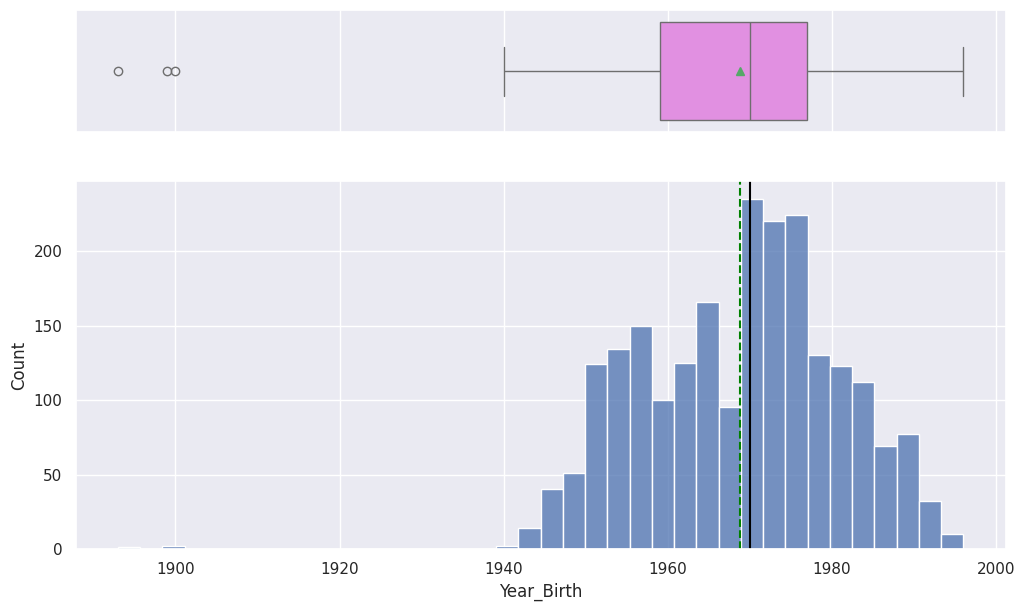

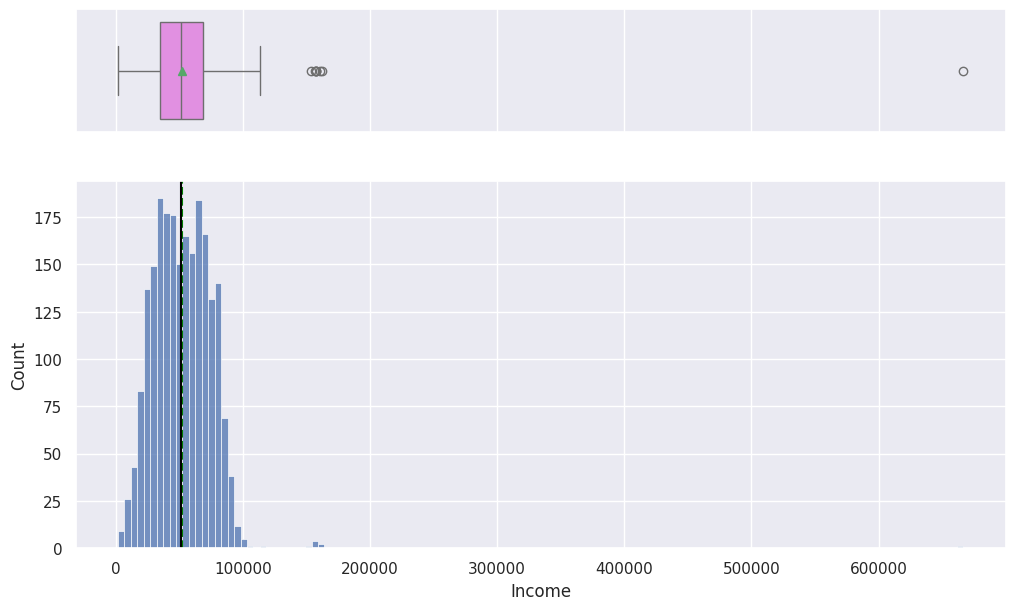

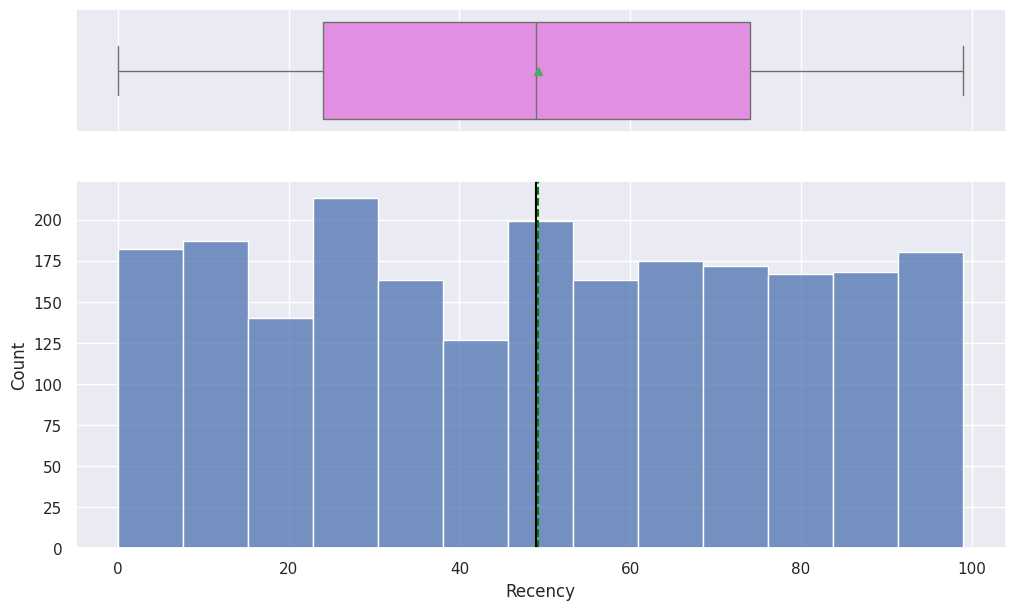

In [ ]:
# Histogram and boxplot depicting profile

histogram_boxplot(df, 'Year_Birth')
histogram_boxplot(df, 'Income')
histogram_boxplot(df, 'Recency')

In [ ]:
#A deeper analysis on Income due to outliers.

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the upper whisker (max value within the non-outlier range)
upper_whisker = Q3 + 1.5 * IQR

# Determine the maximum value within the non-outlier range
max_non_outlier = df['Income'][df['Income'] <= upper_whisker].max()

# Calculate the rank or count of data points below or equal to the upper whisker
count_below_upper_whisker = df[df['Income'] <= max_non_outlier].shape[0]

# Calculate the percentile of the upper whisker
percentile_upper_whisker = (count_below_upper_whisker / df.shape[0]) * 100

# Output the results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Upper Whisker Value: {upper_whisker}")
print(f"Max Non-Outlier Value: {max_non_outlier}")
print(f"Percentile of the Upper Whisker: {percentile_upper_whisker:.2f}%")

Q1 (25th percentile): 35233.5
Q3 (75th percentile): 68522.0
IQR: 33288.5
Upper Whisker Value: 118454.75
Max Non-Outlier Value: 113734.0
Percentile of the Upper Whisker: 98.57%


In [ ]:
#Lets remove the outliers from Income, all those above the upper whisker.

df = df[df['Income'] <= upper_whisker]

**Observations on Customer Profile**


*   Income and birth year follow a normal distribution.
*   The mean birth year is around 1970.
*   The mean income is around 50,000.
*   There is one extreme outlier in Income ~700k and a few outliers at ~ 160k, the upper whisker represents the 98.57 percentile. As almost 99% of datapoints are consiodered non-outliers, I believe we can remove outliers and still have a robust dataset to inform our marketing activities. Even if this tiny group are large spenders, this is likely easily negated by effectively targetting a larger audience with lower spend power.
*   Mean recency is 50 days.
*   64% are together or married.




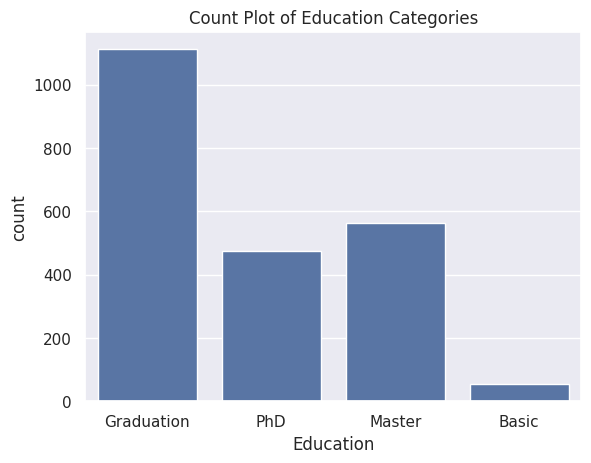

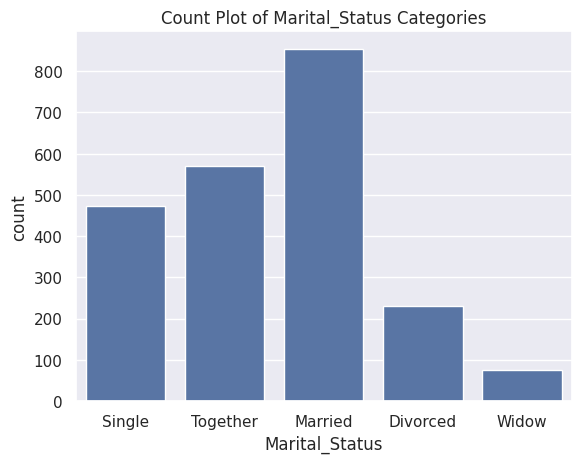

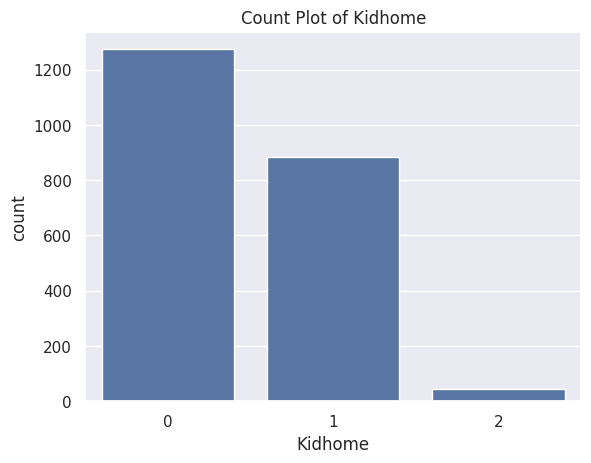

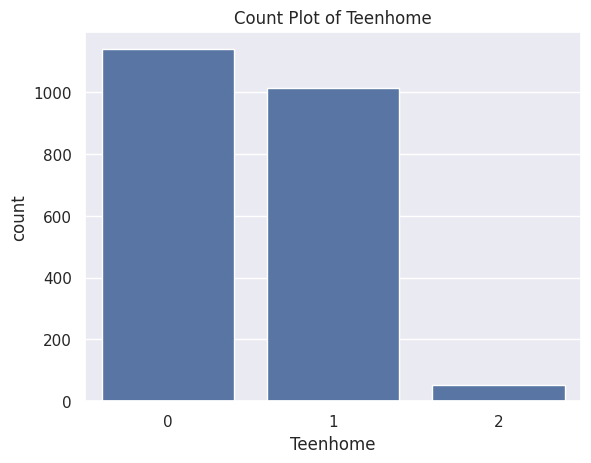

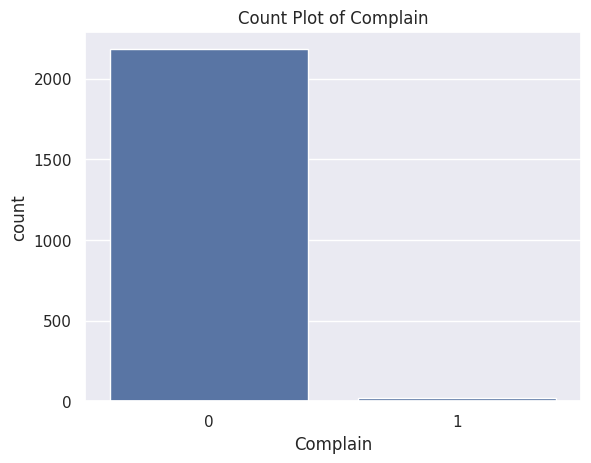

In [ ]:
#Lets take a look at the profile of customers based on categorical variables.

# Count plot for Education
sns.countplot(x='Education', data=df)
plt.title('Count Plot of Education Categories')
plt.show()

# Count plot for Marital_Status
sns.countplot(x='Marital_Status', data=df)
plt.title('Count Plot of Marital_Status Categories')
plt.show()

# Count plot for Kidhome
sns.countplot(x='Kidhome', data=df)
plt.title('Count Plot of Kidhome')
plt.show()

# Count plot for Teenhome
sns.countplot(x='Teenhome', data=df)
plt.title('Count Plot of Teenhome')
plt.show()


# Count plot for Complain
sns.countplot(x='Complain', data=df)
plt.title('Count Plot of Complain')
plt.show()

In [ ]:
#Checking percentage of Complaints in last 2 years

total_complaints = df['Complain'].sum()
total_customers = len(df)
percentage_complaints = (total_complaints / total_customers) * 100

print(f"Percentage of Complaints in Last 2 Years: {percentage_complaints:.2f}%")

Percentage of Complaints in Last 2 Years: 0.95%


**Observations on Customer Profile from Categorical Variables**


*   Based on majorities for higher education, our dataset seems to represent a highly educated subset of the public, and old enough to have completed to PhD level.
*   The majority of customers are Married or in a partnership. The presence of significant counts for Divorced and Widow points to an older demographic.
*   A significant amount of customers have at least one child at home.
*  Less than 1% of customers complained in the last 2 years, pointing to very good cutomer satisfaction.





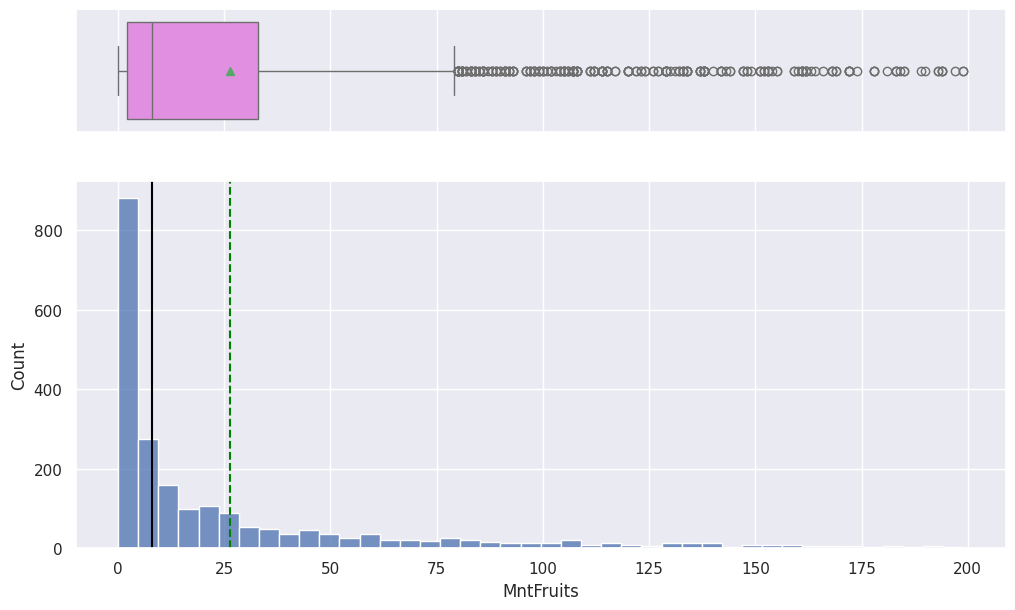

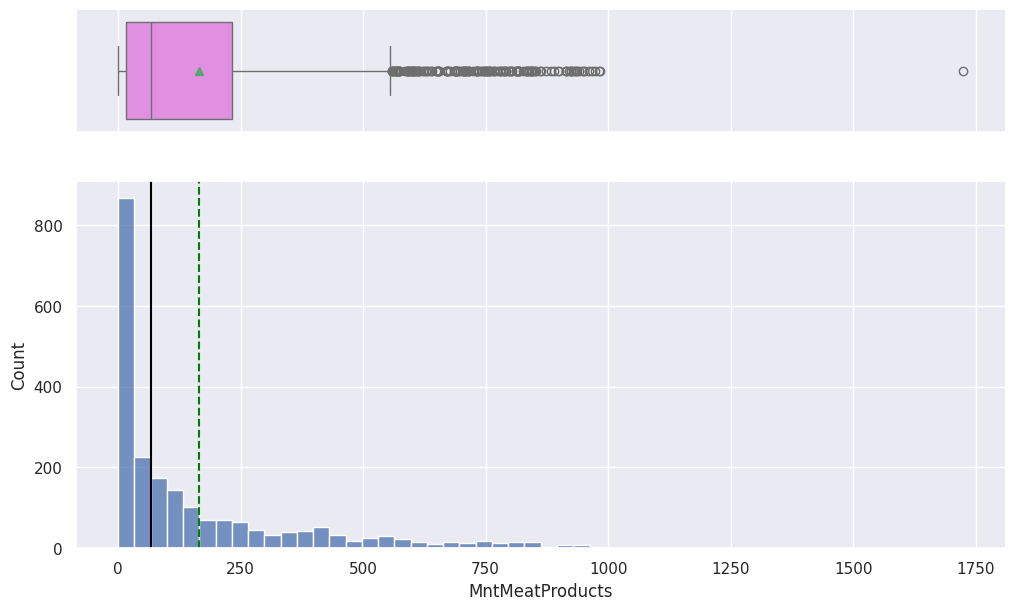

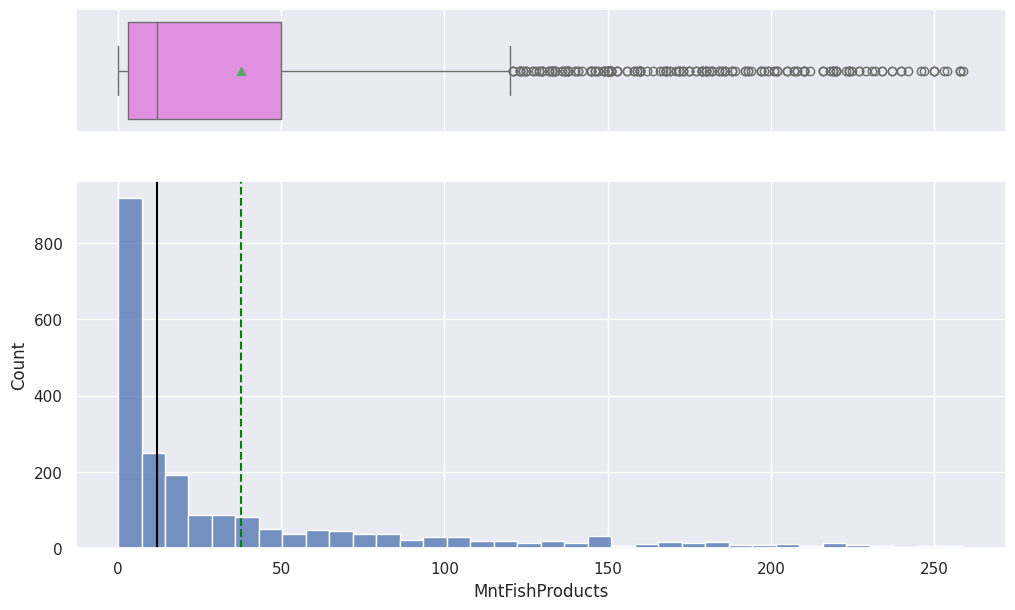

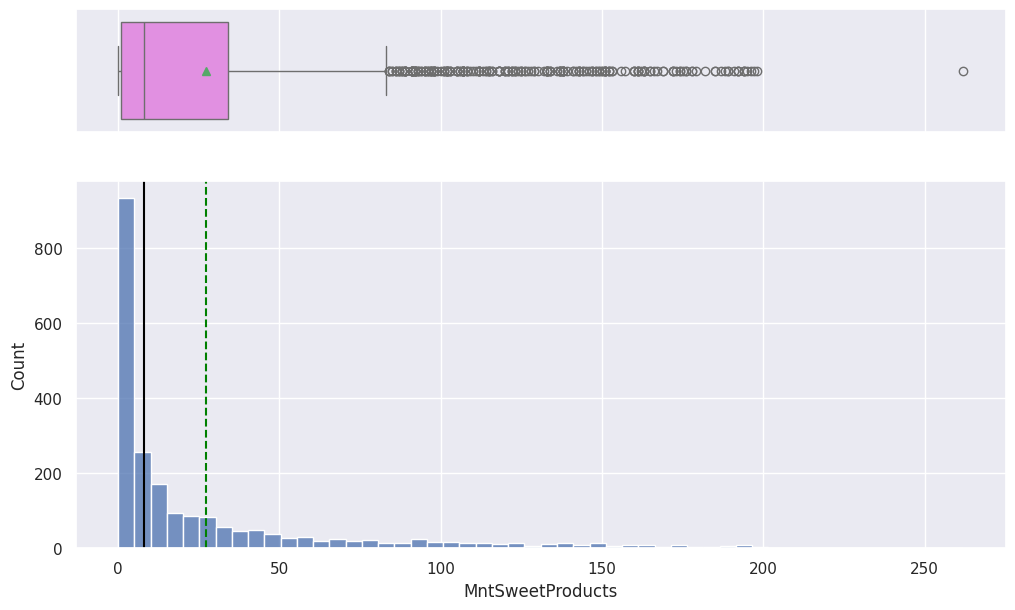

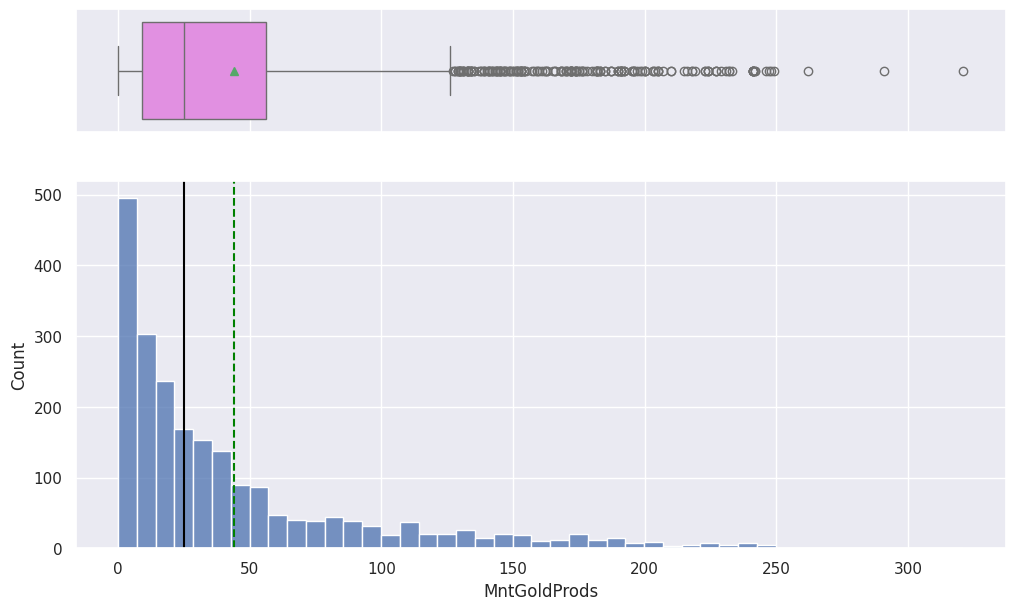

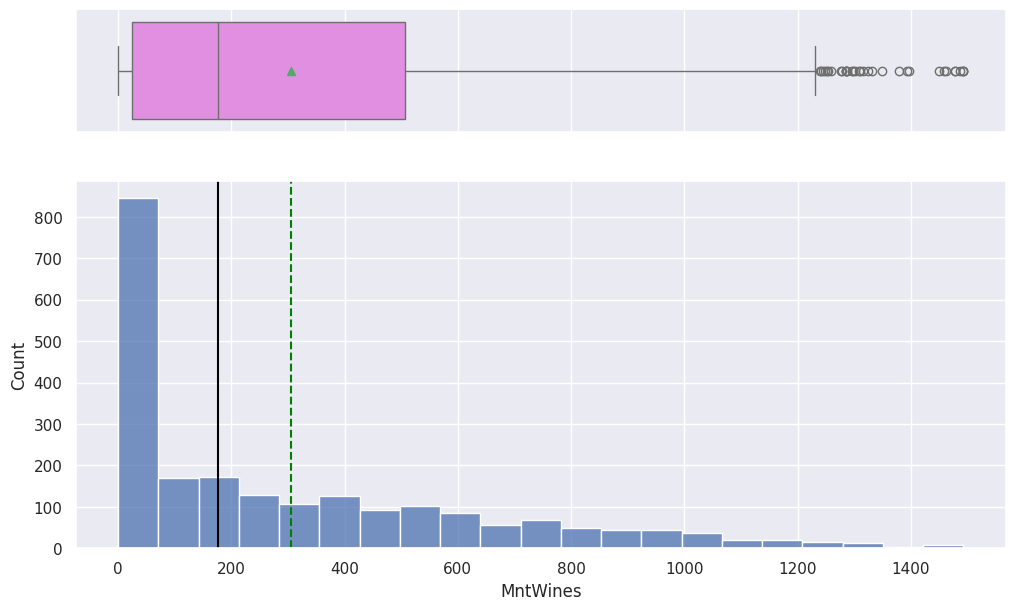

In [ ]:
# Histogram and boxplot depicting spend profiles

histogram_boxplot(df, 'MntFruits')
histogram_boxplot(df, 'MntMeatProducts')
histogram_boxplot(df, 'MntFishProducts')
histogram_boxplot(df, 'MntSweetProducts')
histogram_boxplot(df, 'MntGoldProds')
histogram_boxplot(df, 'MntWines')

**Observations on Product purchasing**


*   Very right skewed data for all.
*   The product with the highest mean spend is wine, followed by meat, then gold, then fish.



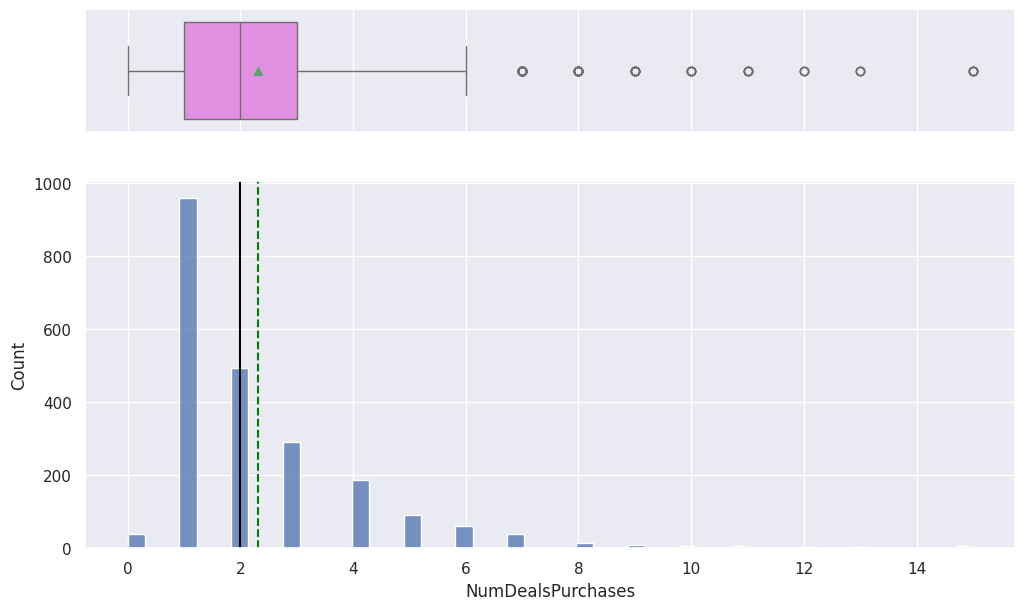

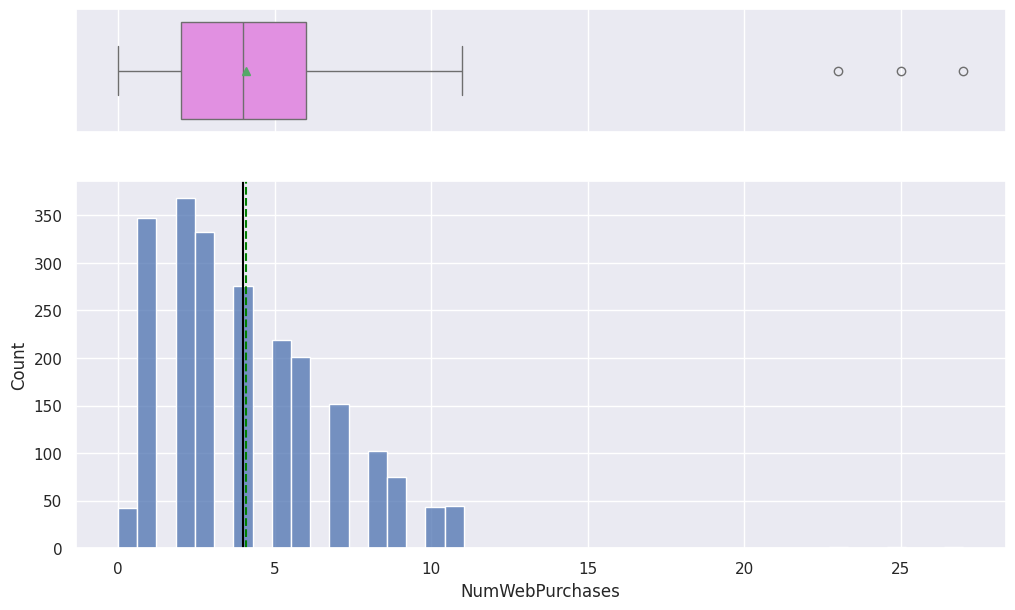

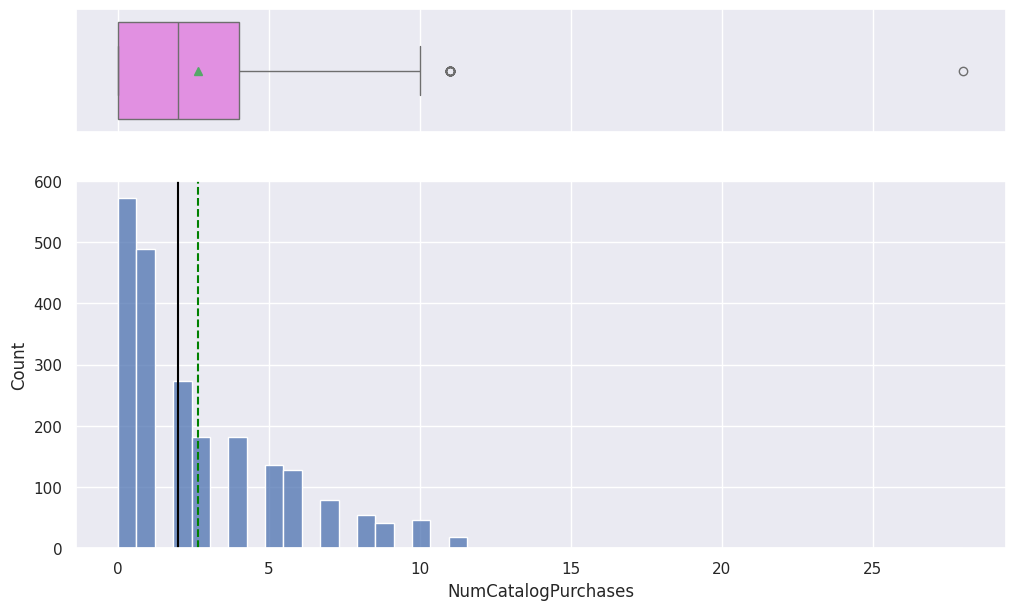

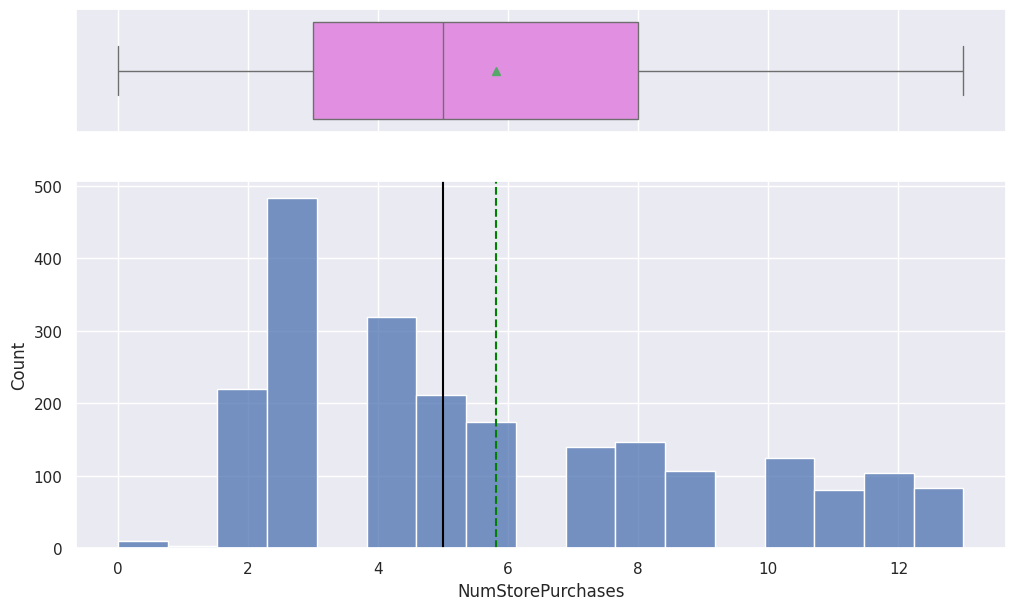

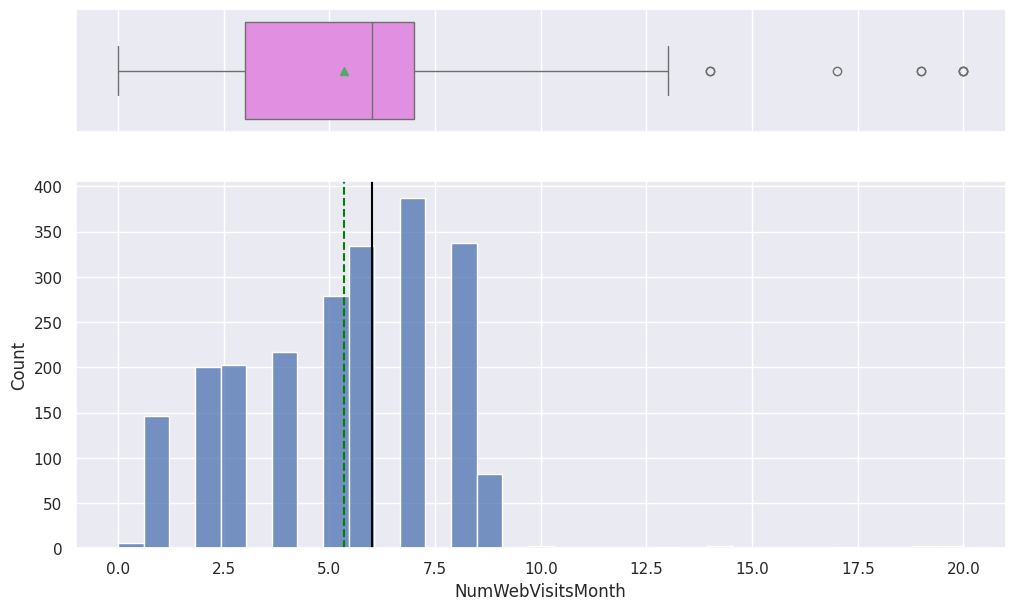

In [ ]:
# Histogram and boxplot depicting purchasing style

histogram_boxplot(df, 'NumDealsPurchases')
histogram_boxplot(df, 'NumWebPurchases')
histogram_boxplot(df, 'NumCatalogPurchases')
histogram_boxplot(df, 'NumStorePurchases')
histogram_boxplot(df, 'NumWebVisitsMonth')

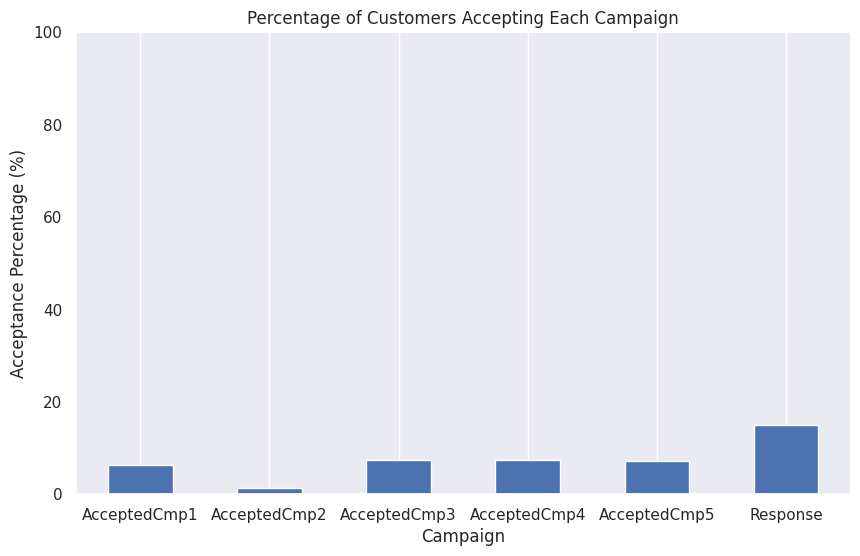

In [ ]:
#Taking a look at acceptance percentage accross the campaigns

campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response',]
df_campaign = df[campaign_columns]

# Calculate the percentage of acceptance for each campaign
acceptance_percentages = df_campaign.mean() * 100

# Plotting
plt.figure(figsize=(10, 6))
acceptance_percentages.plot(kind='bar')
plt.title('Percentage of Customers Accepting Each Campaign')
plt.xlabel('Campaign')
plt.ylabel('Acceptance Percentage (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### **Bivariate Analysis**

 - Analyze different categorical and numerical variables and check how different variables are related to each other.
 - Check the relationship of numerical variables with categorical variables.

Text(0, 0.5, 'Income')

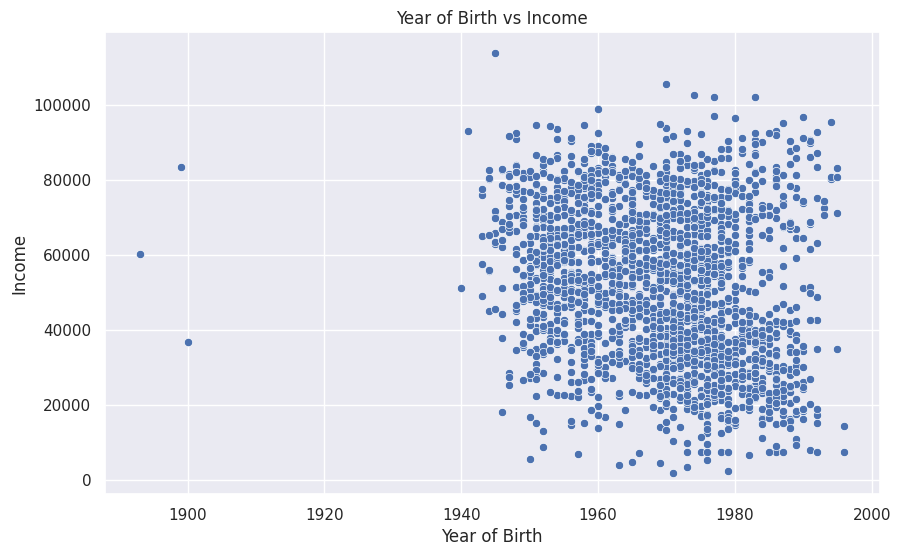

In [ ]:
#Lets plot year birth against income to see if there is any correlation

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Year_Birth', y='Income')
plt.title('Year of Birth vs Income')
plt.xlabel('Year of Birth')
plt.ylabel('Income')

Text(0, 0.5, 'Income')

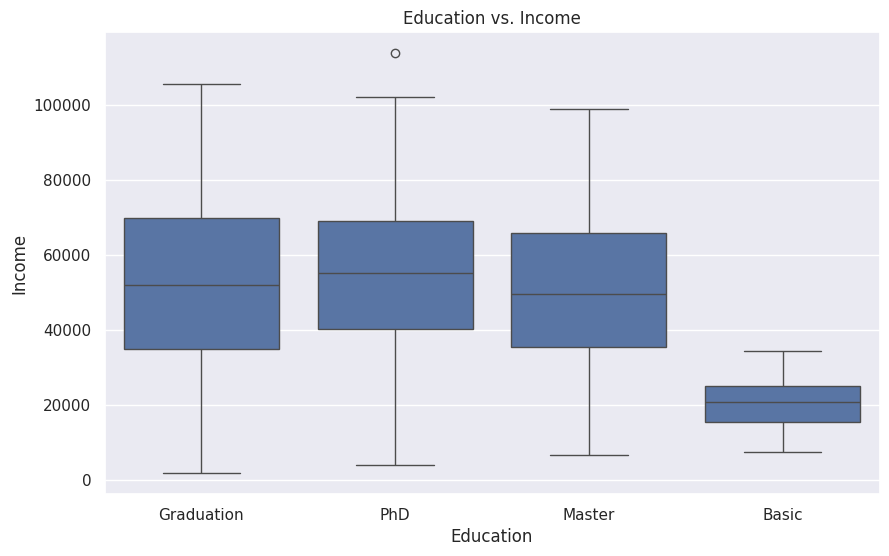

In [ ]:
#Education vs. Income

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Education', y='Income')
plt.title('Education vs. Income')
plt.xlabel('Education')
plt.ylabel('Income')

Text(0, 0.5, 'Income')

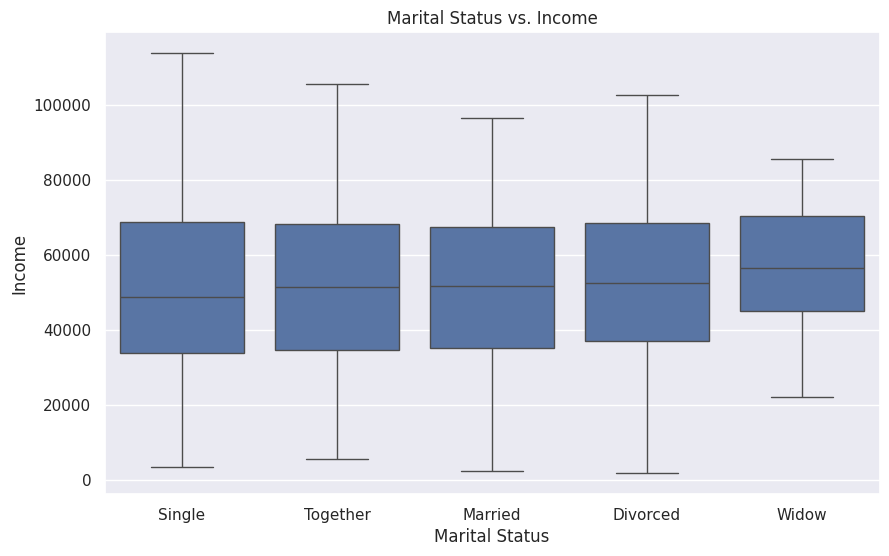

In [ ]:
#Marital_Status vs. Income

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Marital_Status', y='Income')
plt.title('Marital Status vs. Income')
plt.xlabel('Marital Status')
plt.ylabel('Income')

Text(0, 0.5, 'Total Spending')

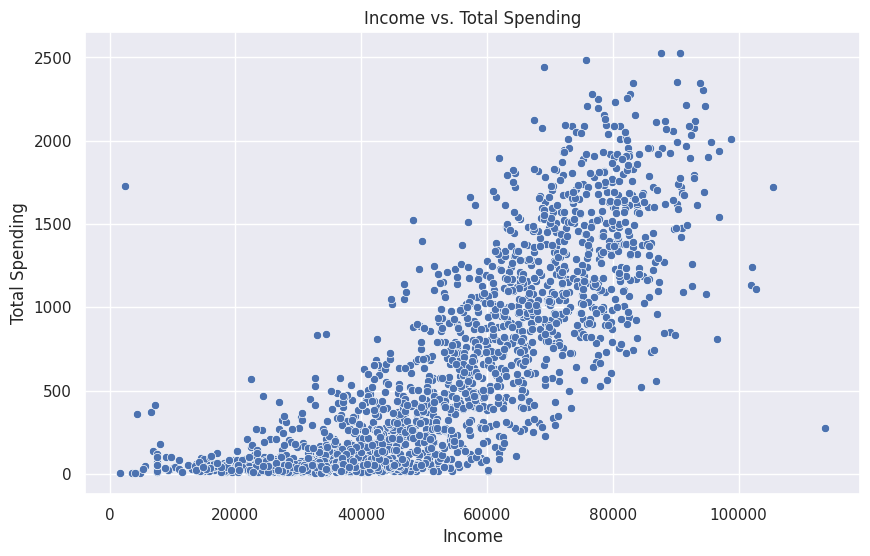

In [ ]:
#Income vs. Total Spending where Total_Spending is sum of MntFishProducts, MntMeatProducts, MntFruits, MntSweetProducts, MntWines, MntGoldProds

Total_Spending = df['MntFishProducts'] + df['MntMeatProducts'] + df['MntFruits'] + df['MntSweetProducts'] + df['MntWines'] + df['MntGoldProds']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y=Total_Spending)
plt.title('Income vs. Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')

Text(0, 0.5, 'NumDealsPurchases')

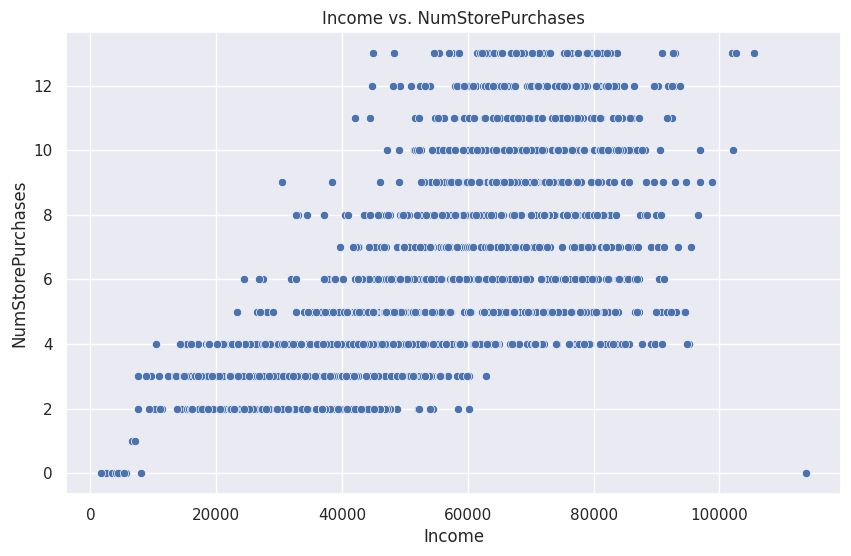

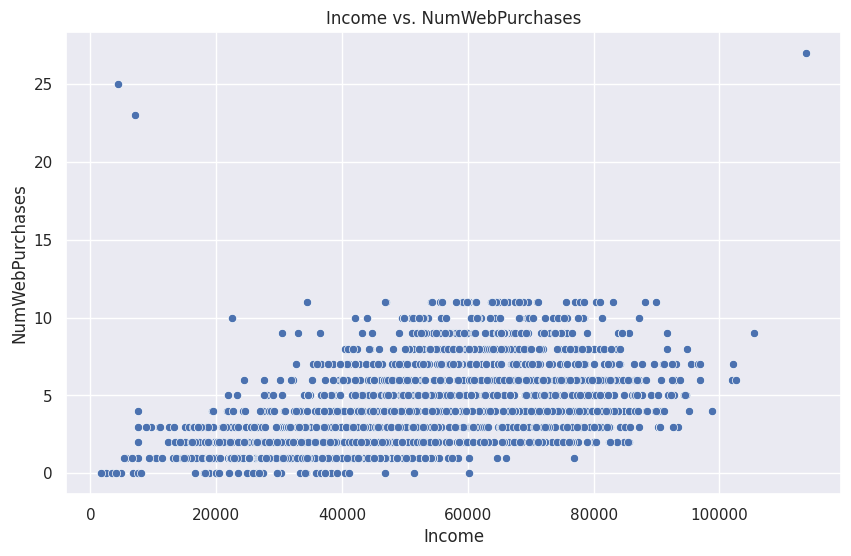

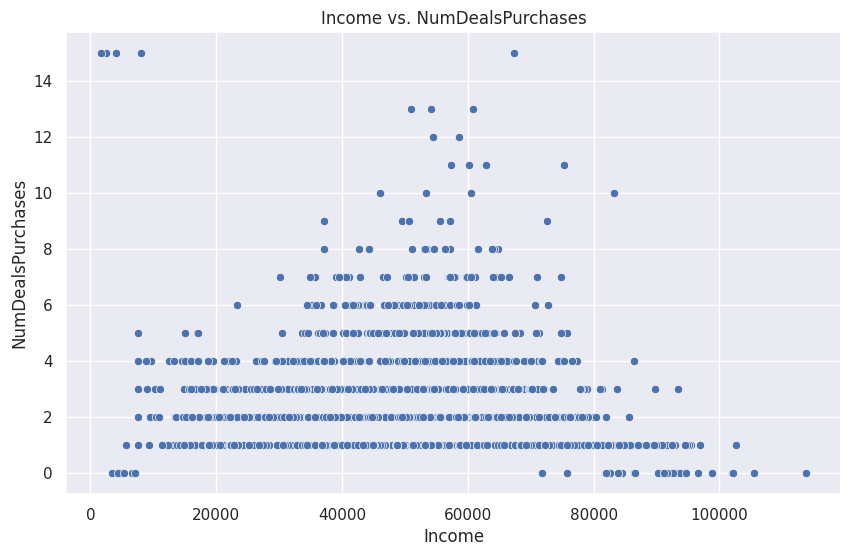

In [ ]:
#Lets plot purchasing method to get an idea of purchasing styles as they relate to income

# Plotting NumStorePurchases vs. Income

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='NumStorePurchases')
plt.title('Income vs. NumStorePurchases')
plt.xlabel('Income')
plt.ylabel('NumStorePurchases')

# Plotting NumWebPurchases vs. Income

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='NumWebPurchases')
plt.title('Income vs. NumWebPurchases')
plt.xlabel('Income')
plt.ylabel('NumWebPurchases')

# Plotting NumDealsPurchases vs. Income

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='NumDealsPurchases')
plt.title('Income vs. NumDealsPurchases')
plt.xlabel('Income')
plt.ylabel('NumDealsPurchases')

**Observations**

It seems that as Income increases, the trend is that both web and store purchases increase too. This is as expected.
Interestingly, as Income increases there isn't a strong correlation with buying a deal, in fact there is a significant group of high Income customers that bought 0 deals. Deals bought seems to be highest around 60k or just above the mean income.

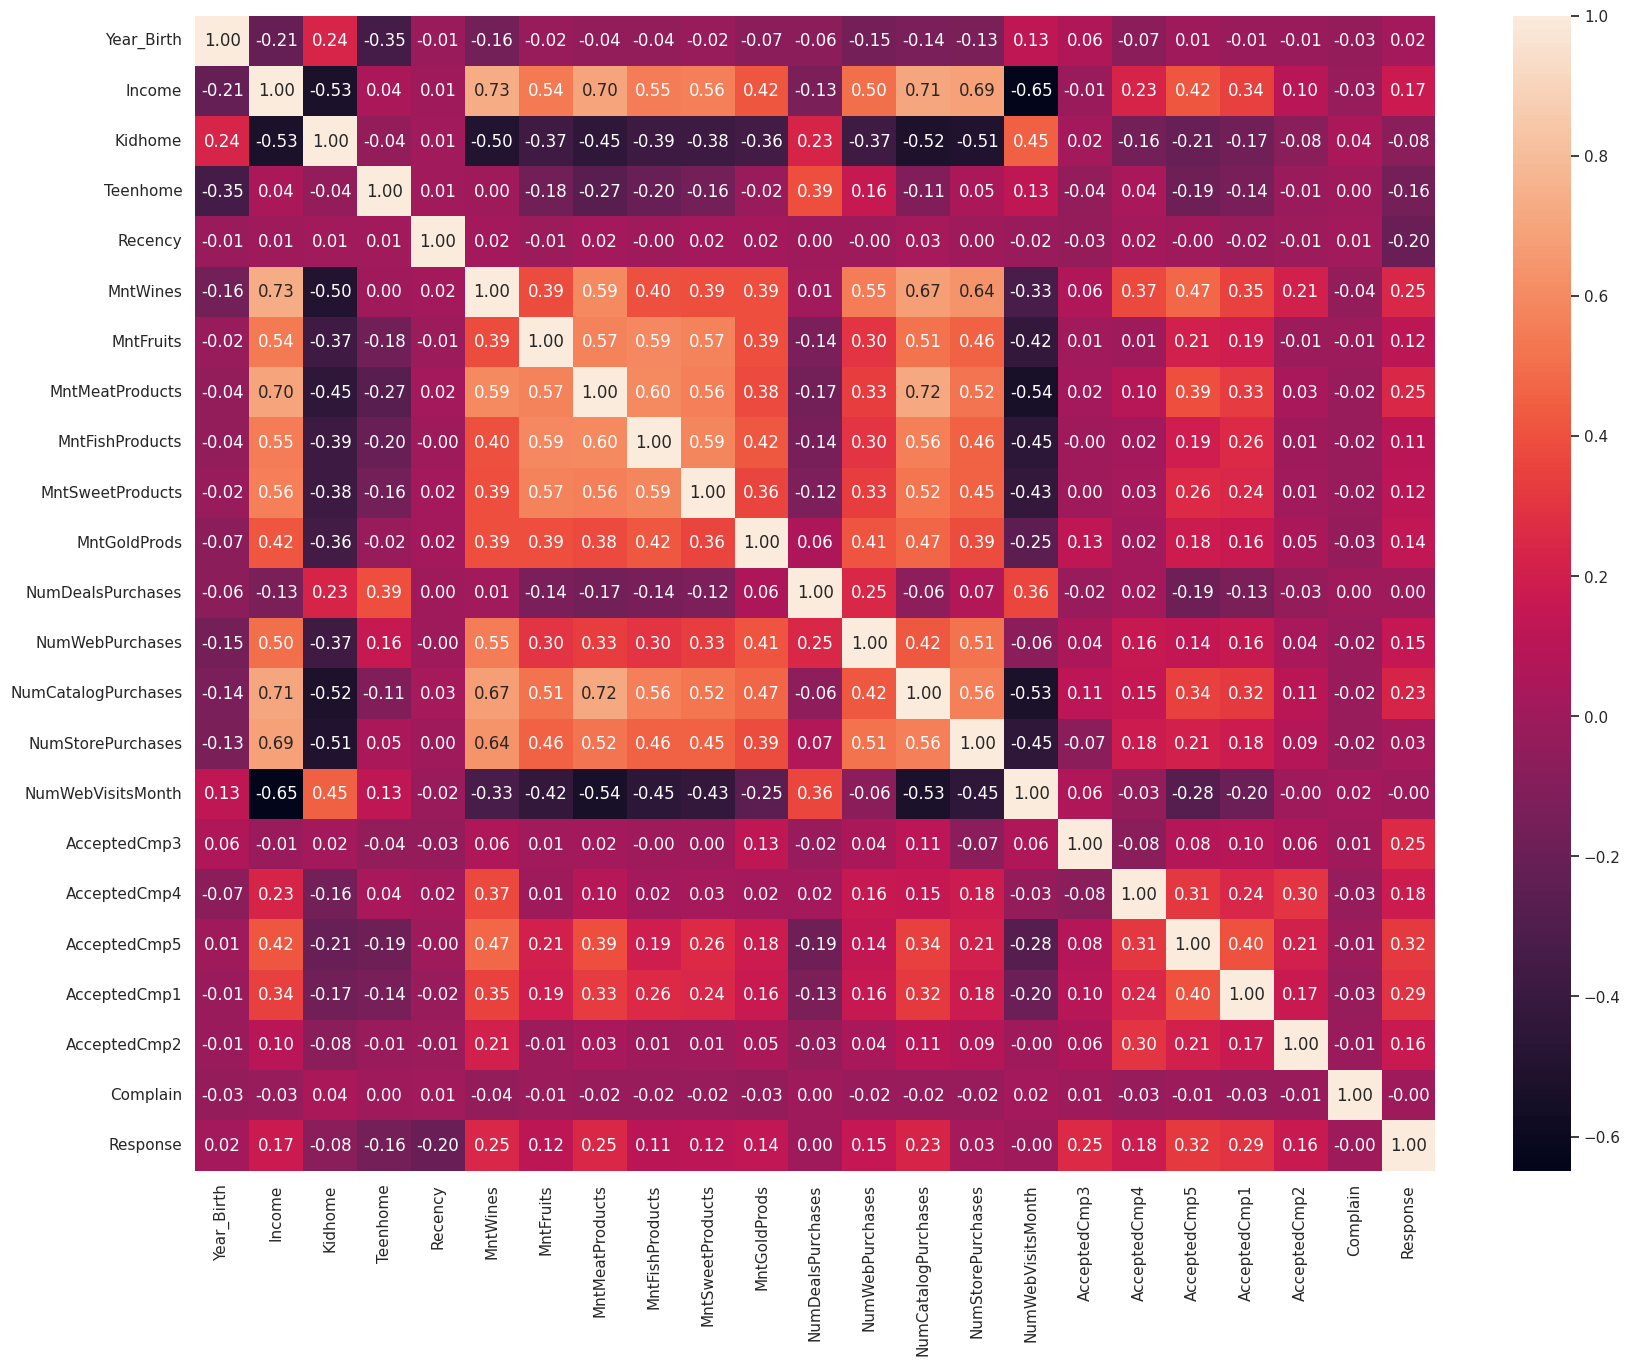

In [ ]:
#Using the seaborn library, we'll plot the heatmap showing the relationship between all numerical variables.

plt.figure(figsize = (20, 15))

sns.heatmap(df.corr(numeric_only = True), annot = True, fmt = '0.2f')

plt.show()

### **Feature Engineering and Data Processing**

In this section, we will first prepare our dataset for analysis.
- Imputing missing values

**Think About It:**

- Can we extract the age of each customer and create a new feature?
- Can we find the total kids and teens in the home?
- Can we find out how many members each family has?
- Can we find the total amount spent by the customers on various products?
- Can we find out how long the customer has been with the company?
- Can we find out how many offers the customers have accepted?
- Can we find out amount spent per purchase?



In [ ]:
#Lets first Impute values into Income due to missing values. We'll impute mean as this is suitable for nomally distributed data.

df['Income'] = df['Income'].fillna(df['Income'].mean())

In [ ]:
#Missing value sanity check

missing_values = df.isnull().sum()
print(missing_values)

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64


In [ ]:
#Lets create a new feature called Age based on Year_Birth, then drop the column Year_Birth

df['Age'] = 2024 - df['Year_Birth']
df_feat_eng = df.drop('Year_Birth', axis=1)

In [ ]:
#Lets use Kidhome and Teenhome to calculate how many children at home.

df_feat_eng['Total_Children'] = df_feat_eng['Kidhome'] + df_feat_eng['Teenhome']

In [ ]:
#Lets make a new feature HouseholdSize using Marital_Status and Total_Children

# Function to calculate HouseholdSize
def calculate_household_size(row):
    if row['Marital_Status'] in ['Married', 'Together']:
        return 2 + row['Total_Children']
    else:
        return 1 + row['Total_Children']

# Apply the function to create HouseholdSize
df_feat_eng['HouseholdSize'] = df_feat_eng.apply(calculate_household_size, axis=1)

df_feat_eng.head()

Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  Graduation         Single  58138.0        0         0  04-09-2012       58   
1  Graduation         Single  46344.0        1         1  08-03-2014       38   
2  Graduation       Together  71613.0        0         0  21-08-2013       26   
3  Graduation       Together  26646.0        1         0  10-02-2014       26   
4         PhD        Married  58293.0        1         0  19-01-2014       94   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0             0             0             0         0         1   67   
1             0             0             0         0         0   70   
2             0             0             0         0         0   59   
3             0             0             0         0         0   40   
4             0             0             0         0         0   43   

   Total_Children  HouseholdSize  
0               0              1  
1               2              3  
2               0              2  
3               1              3  
4               1              3

In [ ]:
#Based on Dt_Customer: Date of customer's enrollment with the company, let's make a new feature YearsLoyal.

# Convert Dt_Customer to datetime with the correct format
df_feat_eng['Dt_Customer'] = pd.to_datetime(df_feat_eng['Dt_Customer'], format='%d-%m-%Y')

# Calculate YearsLoyal
current_date = datetime.now()
df_feat_eng['YearsLoyal'] = (current_date - df_feat_eng['Dt_Customer']).dt.days / 365.25

# Optional: Round to the nearest year
df_feat_eng['YearsLoyal'] = df_feat_eng['YearsLoyal'].round(1)

df_feat_eng.head()

Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  Graduation         Single  58138.0        0         0  2012-09-04       58   
1  Graduation         Single  46344.0        1         1  2014-03-08       38   
2  Graduation       Together  71613.0        0         0  2013-08-21       26   
3  Graduation       Together  26646.0        1         0  2014-02-10       26   
4         PhD        Married  58293.0        1         0  2014-01-19       94   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0             0             0             0         0         1   67   
1             0             0             0         0         0   70   
2             0             0             0         0         0   59   
3             0             0             0         0         0   40   
4             0             0             0         0         0   43   

   Total_Children  HouseholdSize  YearsLoyal  
0               0              1        11.9  
1               2              3        10.4  
2               0              2        11.0  
3               1              3        10.5  
4               1              3        10.6

In [ ]:
#Lets create a new feature called SpendEssentials and SpendLuxuries based on product subcategories

df_feat_eng['SpendEssentials'] = df_feat_eng['MntFruits'] + df_feat_eng['MntMeatProducts'] + df_feat_eng['MntFishProducts']

df_feat_eng['SpendLuxuries'] = df_feat_eng['MntWines'] + df_feat_eng['MntSweetProducts'] + df_feat_eng['MntGoldProds']

df_feat_eng.head()

Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  Graduation         Single  58138.0        0         0  2012-09-04       58   
1  Graduation         Single  46344.0        1         1  2014-03-08       38   
2  Graduation       Together  71613.0        0         0  2013-08-21       26   
3  Graduation       Together  26646.0        1         0  2014-02-10       26   
4         PhD        Married  58293.0        1         0  2014-01-19       94   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0             0             0             0         0         1   67   
1             0             0             0         0         0   70   
2             0             0             0         0         0   59   
3             0             0             0         0         0   40   
4             0             0             0         0         0   43   

   Total_Children  HouseholdSize  YearsLoyal  SpendEssentials  SpendLuxuries  
0               0              1        11.9              806            811  
1               2              3        10.4                9             18  
2               0              2        11.0              287            489  
3               1              3        10.5               34             19  
4               1              3        10.6              207            215

In [ ]:
#We can calculate total number of accepted offers accross the 5 campaigns

df_feat_eng['TotalAcceptedOffers'] = df_feat_eng[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [ ]:
#Lets check the average amount spent per purchase

df_feat_eng['total_purchases'] = df_feat_eng['NumStorePurchases'] + df_feat_eng['NumWebPurchases'] + df_feat_eng['NumCatalogPurchases'] + df_feat_eng['NumDealsPurchases']

df_feat_eng['SpendPerPurchase'] = df_feat_eng['SpendLuxuries'] + df_feat_eng['SpendEssentials'] / df_feat_eng['total_purchases']

df_feat_eng.head()

Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  Graduation         Single  58138.0        0         0  2012-09-04       58   
1  Graduation         Single  46344.0        1         1  2014-03-08       38   
2  Graduation       Together  71613.0        0         0  2013-08-21       26   
3  Graduation       Together  26646.0        1         0  2014-02-10       26   
4         PhD        Married  58293.0        1         0  2014-01-19       94   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0             0             0             0         0         1   67   
1             0             0             0         0         0   70   
2             0             0             0         0         0   59   
3             0             0             0         0         0   40   
4             0             0             0         0         0   43   

   Total_Children  HouseholdSize  YearsLoyal  SpendEssentials  SpendLuxuries  \
0               0              1        11.9              806            811   
1               2              3        10.4                9             18   
2               0              2        11.0              287            489   
3               1              3        10.5               34             19   
4               1              3        10.6              207            215   

   TotalAcceptedOffers  total_purchases  SpendPerPurchase  
0                    0               25        843.240000  
1                    0                6         19.500000  
2                    0               21        502.666667  
3                    0                8         23.250000  
4                    0               19        225.894737

In [ ]:
#Now we can drop the colums we dont need as we now have the new features, lets drop Kidhome, Teenhome, Dt_Customer, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2,

df_feat_eng.drop(['Kidhome', 'Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2'], axis=1, inplace=True)

df_feat_eng.head()

Education Marital_Status   Income  Recency  NumDealsPurchases  \
0  Graduation         Single  58138.0       58                  3   
1  Graduation         Single  46344.0       38                  2   
2  Graduation       Together  71613.0       26                  1   
3  Graduation       Together  26646.0       26                  2   
4         PhD        Married  58293.0       94                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   Complain  Response  Age  Total_Children  HouseholdSize  YearsLoyal  \
0         0         1   67               0              1        11.9   
1         0         0   70               2              3        10.4   
2         0         0   59               0              2        11.0   
3         0         0   40               1              3        10.5   
4         0         0   43               1              3        10.6   

   SpendEssentials  SpendLuxuries  TotalAcceptedOffers  total_purchases  \
0              806            811                    0               25   
1                9             18                    0                6   
2              287            489                    0               21   
3               34             19                    0                8   
4              207            215                    0               19   

   SpendPerPurchase  
0        843.240000  
1         19.500000  
2        502.666667  
3         23.250000  
4        225.894737

In [ ]:
#We now have a clear and clean dataset for further analysis, we'll make a copy.

df_clean = df_feat_eng.copy()

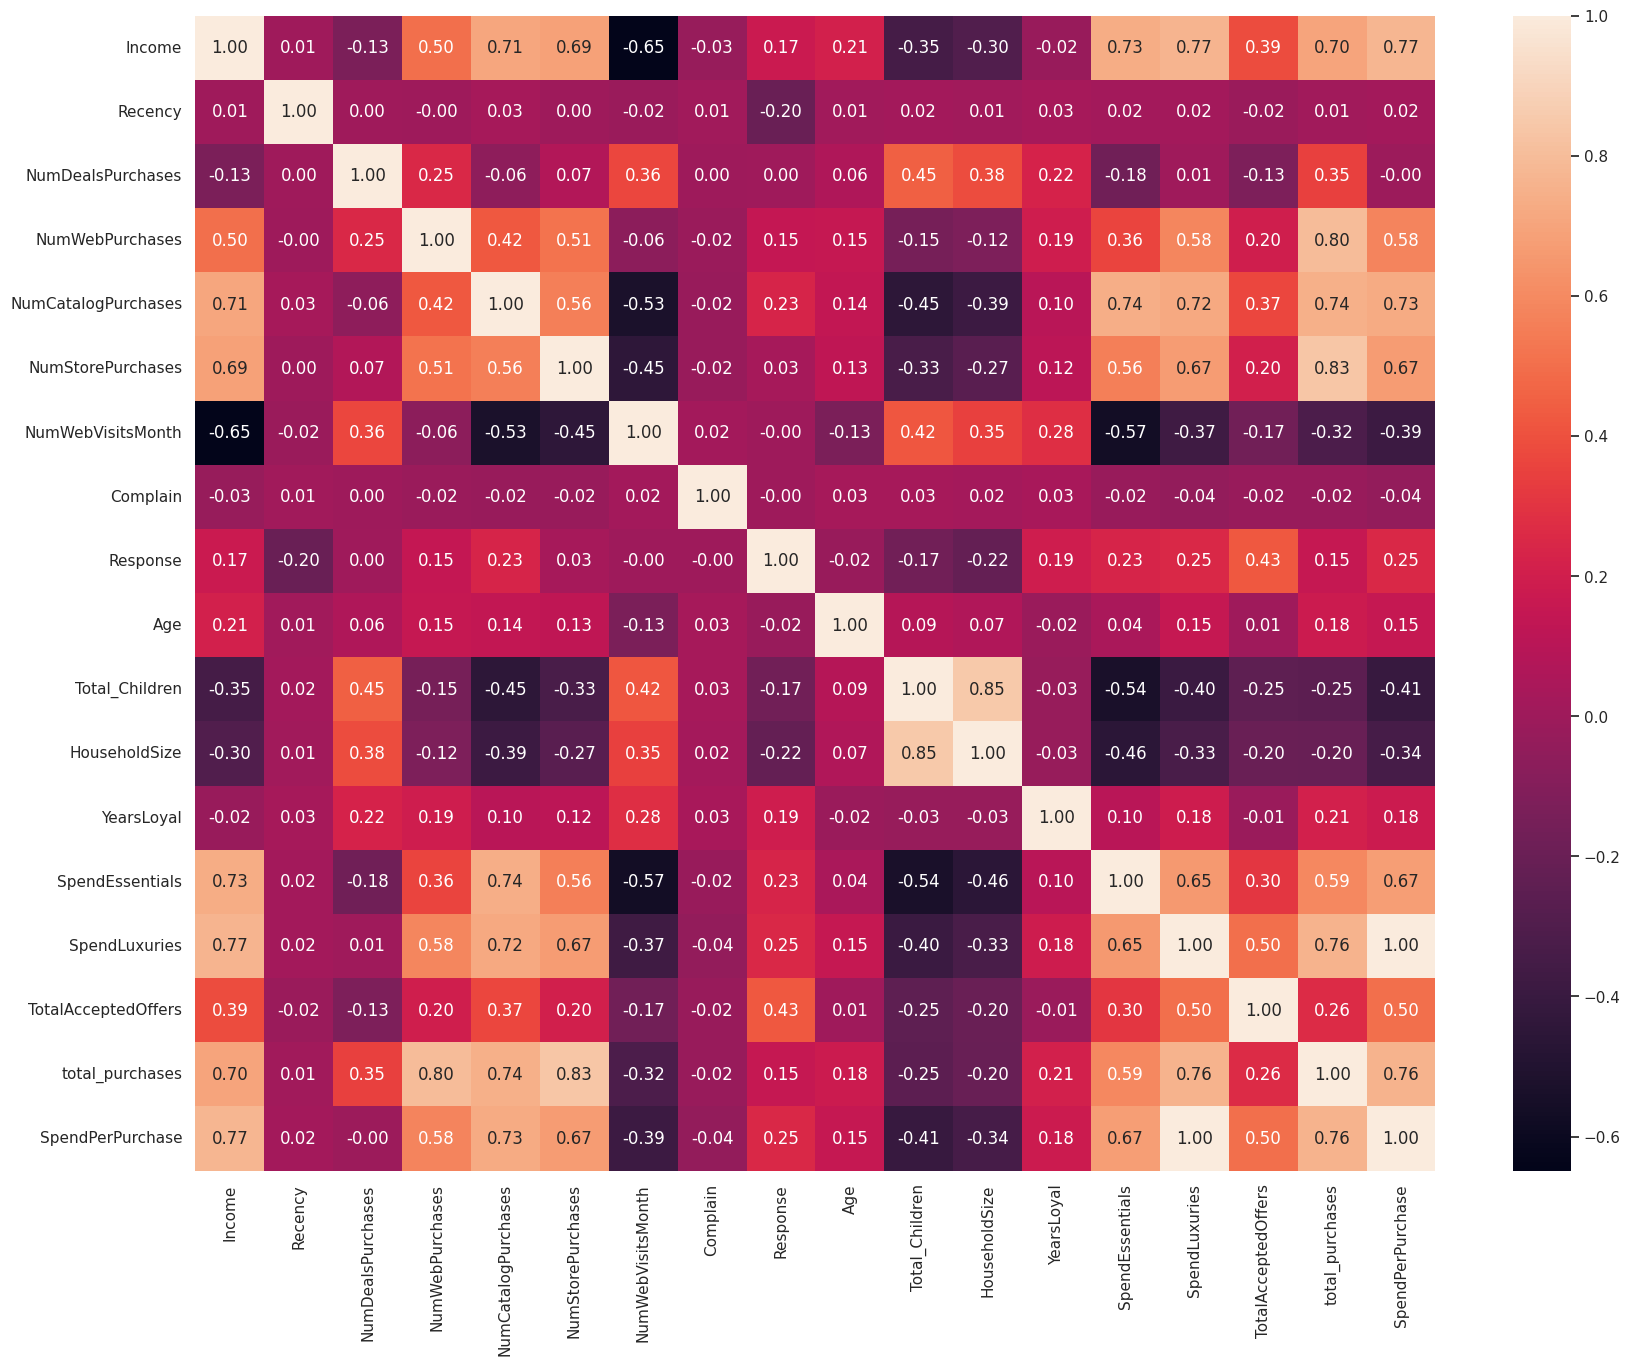

In [ ]:
#Let's again plot the heatmap showing the relationship between all numerical variables in df_clean.

plt.figure(figsize = (20, 15))

sns.heatmap(df_clean.corr(numeric_only = True), annot = True, fmt = '0.2f')

plt.show()

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Data Preparation for Segmentation**

- The decision about which variables to use for clustering is a critically important decision that will have a big impact on the clustering solution. So we need to think carefully about the variables we will choose for clustering. Clearly, this is a step where a lot of contextual knowledge, creativity, and experimentation/iterations are needed.
- Moreover, we often use only a few of the data attributes for segmentation (the segmentation attributes) and use some of the remaining ones (the profiling attributes) only to profile the clusters. For example, in market research and market segmentation, we can use behavioral data for segmentation (to segment the customers based on their behavior like amount spent, units bought, etc.), and then use both demographic as well as behavioral data for profiling the segments found.
- Plot the correlation plot after we've removed the irrelevant variables
- Scale the Data

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2204 entries, 0 to 2235
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2204 non-null   object 
 1   Marital_Status       2204 non-null   object 
 2   Income               2204 non-null   float64
 3   Recency              2204 non-null   int64  
 4   NumDealsPurchases    2204 non-null   int64  
 5   NumWebPurchases      2204 non-null   int64  
 6   NumCatalogPurchases  2204 non-null   int64  
 7   NumStorePurchases    2204 non-null   int64  
 8   NumWebVisitsMonth    2204 non-null   int64  
 9   Complain             2204 non-null   int64  
 10  Response             2204 non-null   int64  
 11  Age                  2204 non-null   int64  
 12  Total_Children       2204 non-null   int64  
 13  HouseholdSize        2204 non-null   int64  
 14  YearsLoyal           2204 non-null   float64
 15  SpendEssentials      2204 non-null   int64 

In [ ]:
#Now we can drop the colums we dont need for segmentation. Profiling column are dropped in favour of behavioural data, 'Recency' doesnt seem to reveal any correllations based on the previous heatmap, so we'll drop that also.

df_clean.drop(['Education', 'Marital_Status', 'Income', 'Age','Recency','Total_Children', 'HouseholdSize'], axis=1, inplace=True)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2204 entries, 0 to 2235
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NumDealsPurchases    2204 non-null   int64  
 1   NumWebPurchases      2204 non-null   int64  
 2   NumCatalogPurchases  2204 non-null   int64  
 3   NumStorePurchases    2204 non-null   int64  
 4   NumWebVisitsMonth    2204 non-null   int64  
 5   Complain             2204 non-null   int64  
 6   Response             2204 non-null   int64  
 7   YearsLoyal           2204 non-null   float64
 8   SpendEssentials      2204 non-null   int64  
 9   SpendLuxuries        2204 non-null   int64  
 10  TotalAcceptedOffers  2204 non-null   int64  
 11  total_purchases      2204 non-null   int64  
 12  SpendPerPurchase     2204 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 241.1 KB


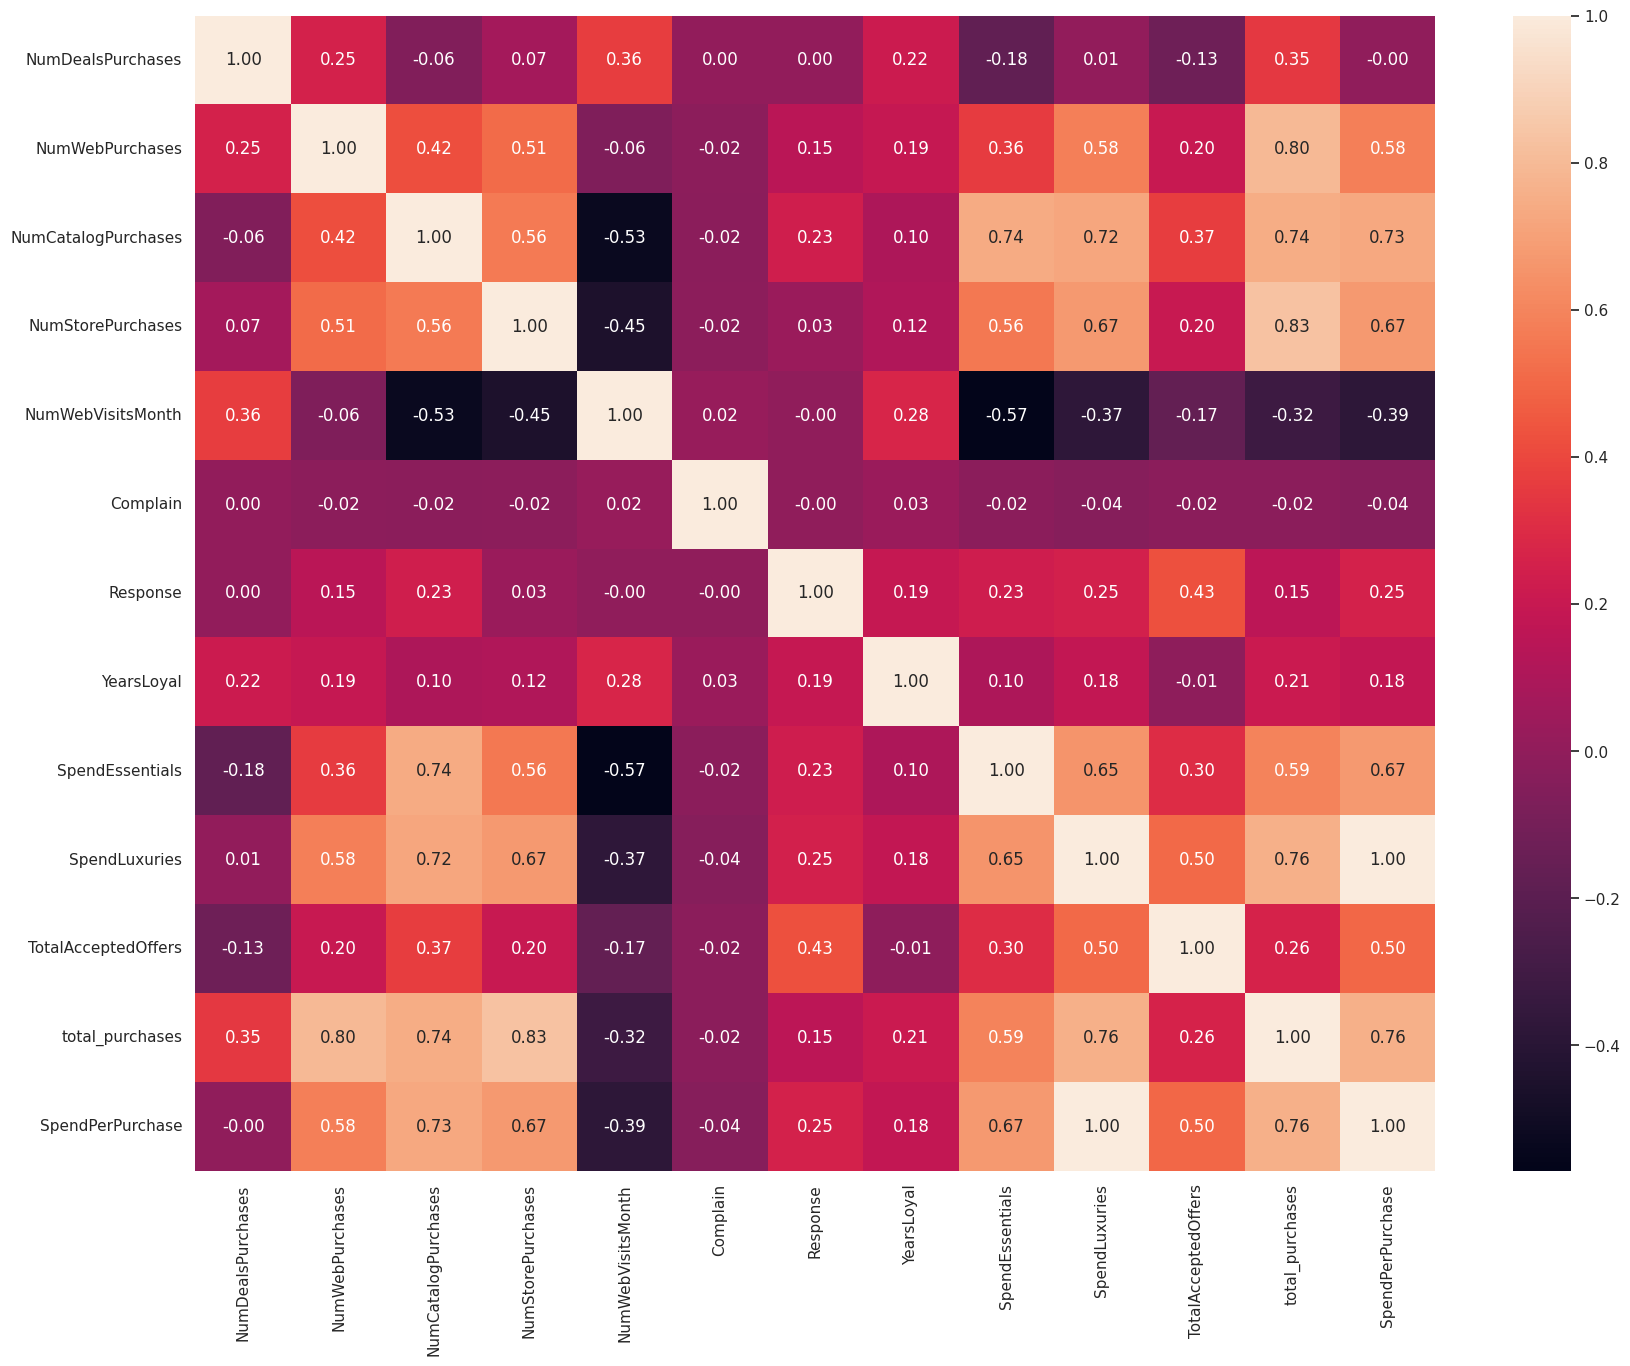

In [ ]:
#Let's again plot the heatmap showing the relationship between all numerical variables in df_clean following the removal of profile features.

plt.figure(figsize = (20, 15))

sns.heatmap(df_clean.corr(numeric_only = True), annot = True, fmt = '0.2f')

plt.show()

In [ ]:
#Find inf or -inf values in df_clean due to an error in scaling

inf_values = df_clean.isin([np.inf, -np.inf]).any()
print(inf_values)

NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
Complain               False
Response               False
YearsLoyal             False
SpendEssentials        False
SpendLuxuries          False
TotalAcceptedOffers    False
total_purchases        False
SpendPerPurchase        True
dtype: bool


In [ ]:
#Check df_clean statistics

df_clean.describe().T

count        mean         std        min       25%  \
NumDealsPurchases    2204.0    2.314428    1.885162   0.000000   1.00000   
NumWebPurchases      2204.0    4.096189    2.737710   0.000000   2.00000   
NumCatalogPurchases  2204.0    2.642015    2.795703   0.000000   0.00000   
NumStorePurchases    2204.0    5.818512    3.244703   0.000000   3.00000   
NumWebVisitsMonth    2204.0    5.335299    2.411880   0.000000   3.00000   
Complain             2204.0    0.009528    0.097168   0.000000   0.00000   
Response             2204.0    0.150181    0.357330   0.000000   0.00000   
YearsLoyal           2204.0   11.099501    0.554210  10.100000  10.60000   
SpendEssentials      2204.0  229.359800  280.579764   1.000000  25.00000   
SpendLuxuries        2204.0  377.150635  380.137810   3.000000  41.00000   
TotalAcceptedOffers  2204.0    0.298548    0.677622   0.000000   0.00000   
total_purchases      2204.0   14.871143    7.620224   0.000000   8.00000   
SpendPerPurchase     2204.0         inf         NaN   3.333333  45.39375   

                            50%         75%     max  
NumDealsPurchases      2.000000    3.000000    15.0  
NumWebPurchases        4.000000    6.000000    27.0  
NumCatalogPurchases    2.000000    4.000000    28.0  
NumStorePurchases      5.000000    8.000000    13.0  
NumWebVisitsMonth      6.000000    7.000000    20.0  
Complain               0.000000    0.000000     1.0  
Response               0.000000    0.000000     1.0  
YearsLoyal            11.100000   11.600000    12.0  
SpendEssentials       90.500000  356.250000  1727.0  
SpendLuxuries        248.000000  617.250000  1689.0  
TotalAcceptedOffers    0.000000    0.000000     4.0  
total_purchases       15.000000   21.000000    43.0  
SpendPerPurchase     259.520221  641.616029     inf

In [ ]:
#The instances where registered customers made no purchases are causing values of inf for SpendPerPurchase, we can remove these rows from the analysis as they arent useful.

df_clean = df_clean[df_clean['SpendPerPurchase'] != np.inf]

In [ ]:
#Lets also remove total_purchases as it's not needed for clustering.

df_clean.drop(['total_purchases'], axis=1, inplace=True)

NumDealsPurchases
Skew : 2.32


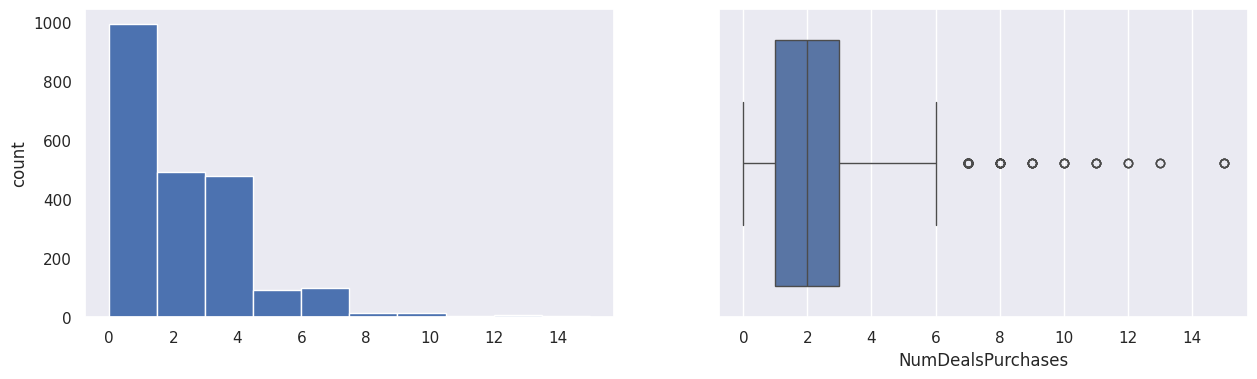

NumWebPurchases
Skew : 1.21


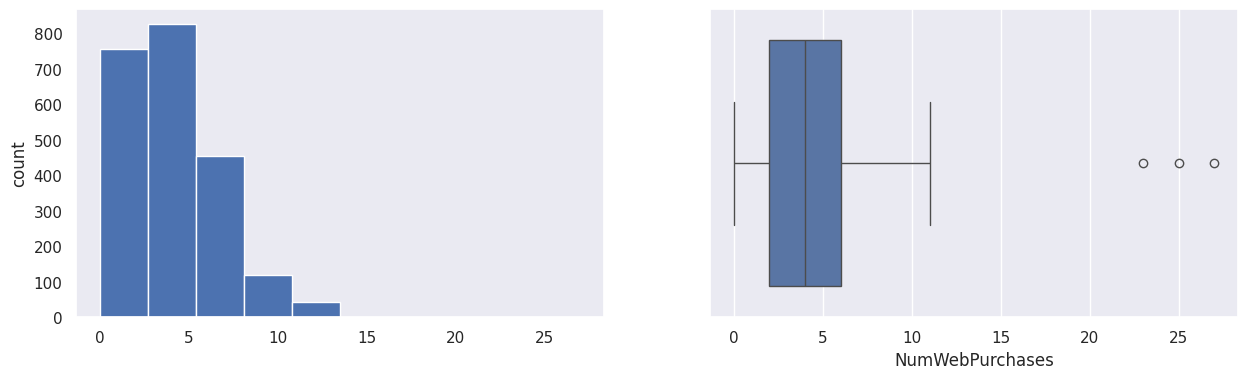

NumCatalogPurchases
Skew : 1.37


NumStorePurchases
Skew : 0.71


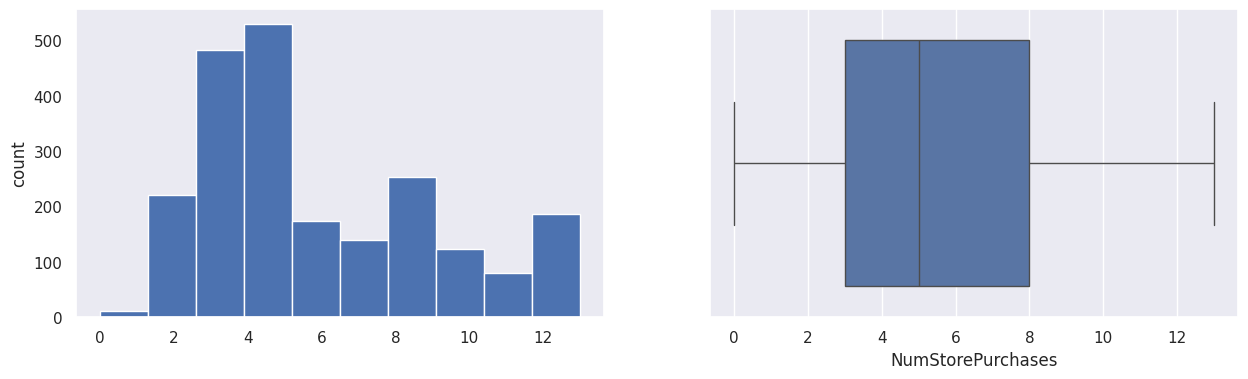

NumWebVisitsMonth
Skew : 0.2


Complain
Skew : 10.1


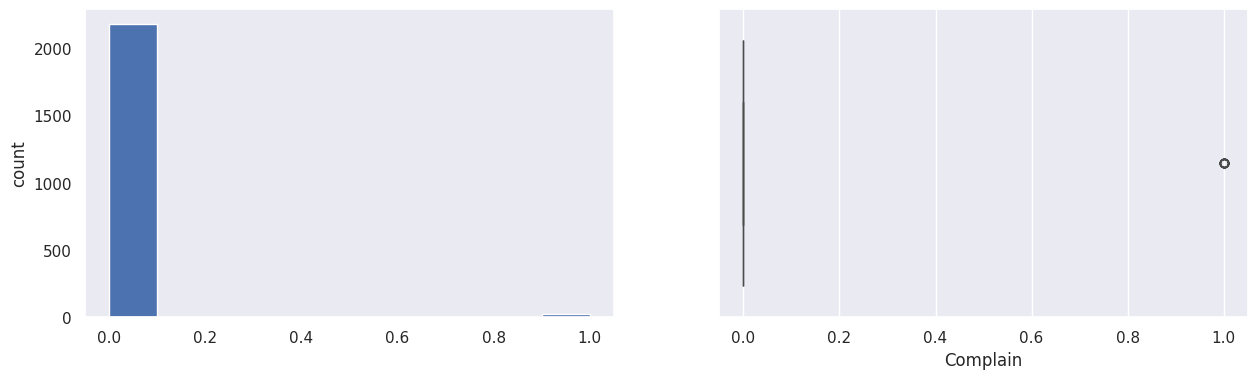

Response
Skew : 1.96


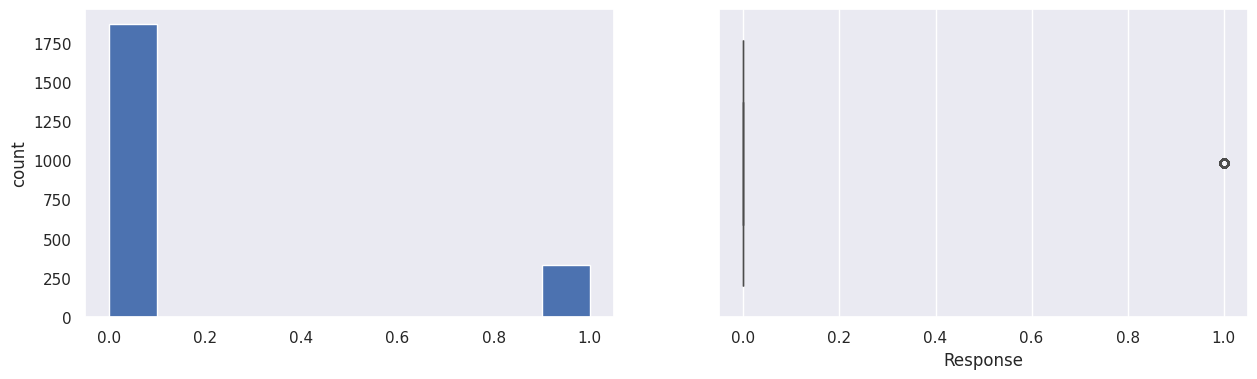

YearsLoyal
Skew : -0.02


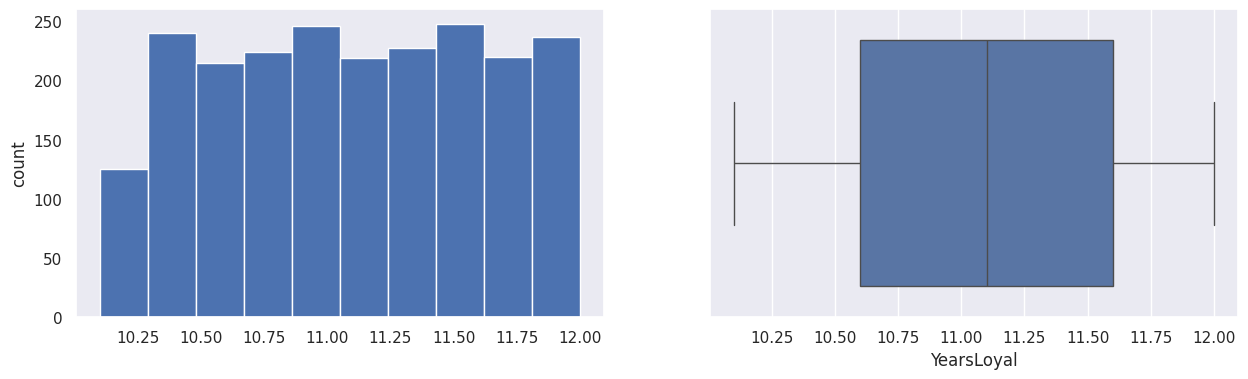

SpendEssentials
Skew : 1.49


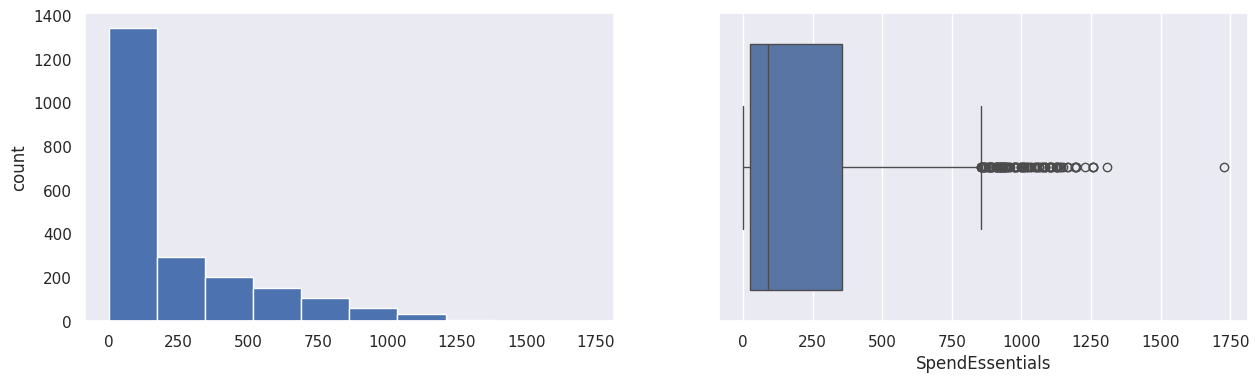

SpendLuxuries
Skew : 0.97


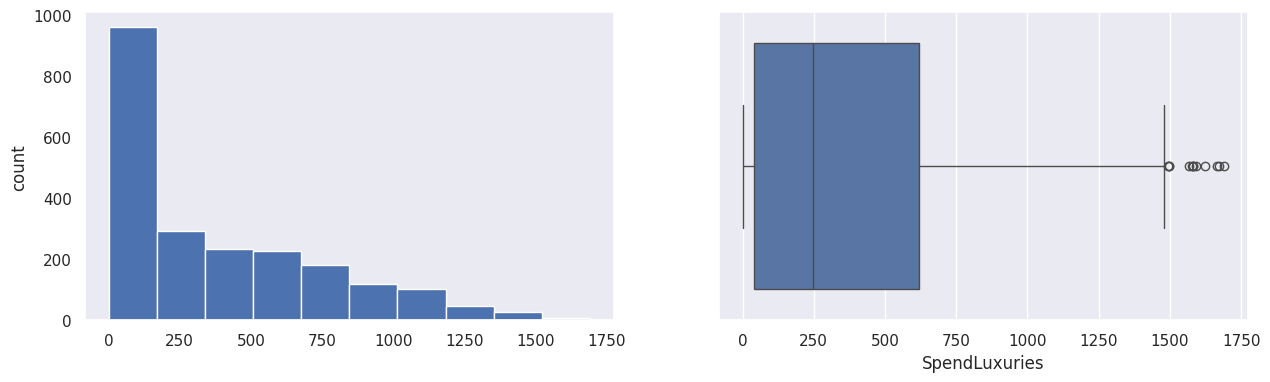

TotalAcceptedOffers
Skew : 2.7


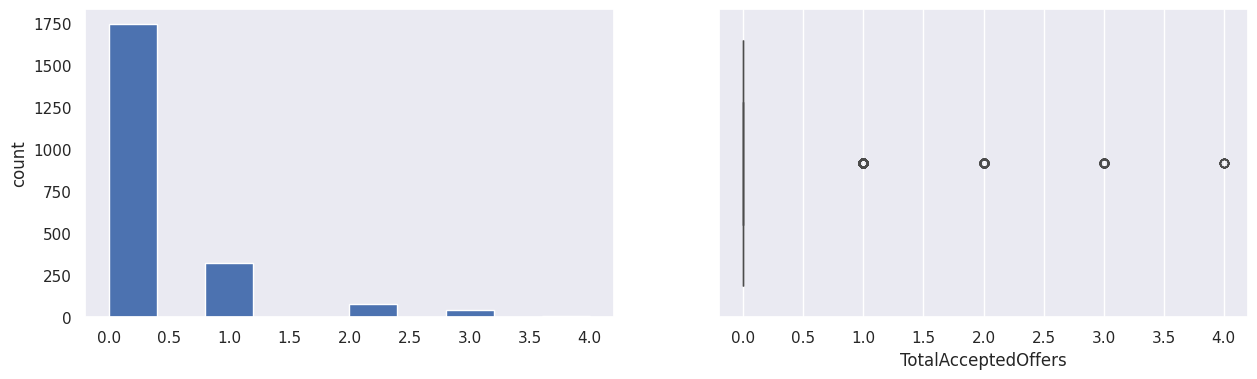

SpendPerPurchase
Skew : 0.94


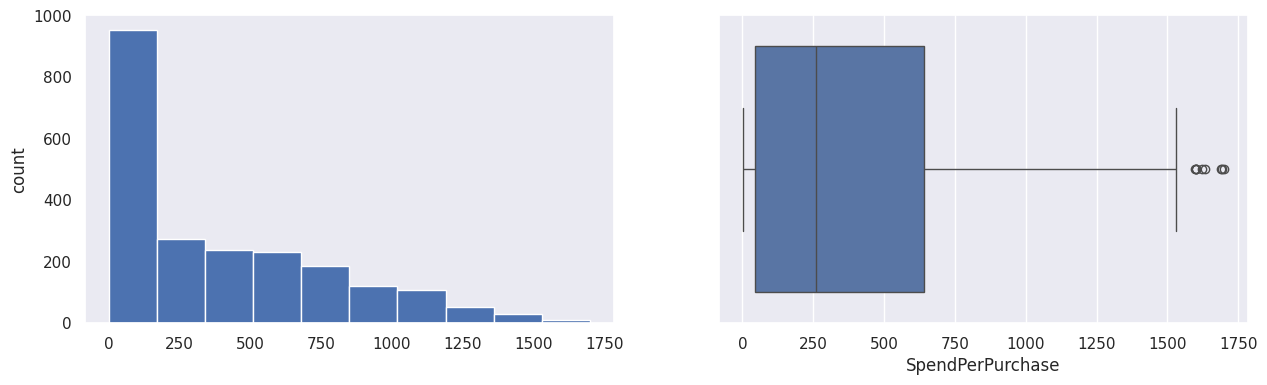

In [ ]:
#A final sanity look at the boxplots for the slected features #Selecting only the numerical data types, we use a for loop to iterate through the columns and plot histogram and boxplot for each.

result = df_clean.select_dtypes(include = 'number')

cont_cols = list(result)

for col in cont_cols:

    print(col)

    print('Skew :',round(df_clean[col].skew(),2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)

    df_clean[col].hist(bins = 10, grid = False)

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = df_clean[col])

    plt.show()

In [ ]:
#Check df_clean statistics

df_clean.describe().T

count        mean         std        min       25%  \
NumDealsPurchases    2202.0    2.316530    1.884726   0.000000   1.00000   
NumWebPurchases      2202.0    4.099909    2.736166   0.000000   2.00000   
NumCatalogPurchases  2202.0    2.644414    2.795838   0.000000   0.00000   
NumStorePurchases    2202.0    5.823797    3.241431   0.000000   3.00000   
NumWebVisitsMonth    2202.0    5.327430    2.398785   0.000000   3.00000   
Complain             2202.0    0.009537    0.097212   0.000000   0.00000   
Response             2202.0    0.150318    0.357464   0.000000   0.00000   
YearsLoyal           2202.0   11.099818    0.554114  10.100000  10.60000   
SpendEssentials      2202.0  229.565849  280.623826   1.000000  25.00000   
SpendLuxuries        2202.0  377.490463  380.143055   3.000000  41.25000   
TotalAcceptedOffers  2202.0    0.298819    0.677870   0.000000   0.00000   
SpendPerPurchase     2202.0  389.892470  388.225139   3.333333  45.38125   

                            50%         75%     max  
NumDealsPurchases      2.000000    3.000000    15.0  
NumWebPurchases        4.000000    6.000000    27.0  
NumCatalogPurchases    2.000000    4.000000    28.0  
NumStorePurchases      5.000000    8.000000    13.0  
NumWebVisitsMonth      6.000000    7.000000    20.0  
Complain               0.000000    0.000000     1.0  
Response               0.000000    0.000000     1.0  
YearsLoyal            11.100000   11.600000    12.0  
SpendEssentials       91.000000  356.750000  1727.0  
SpendLuxuries        248.000000  617.750000  1689.0  
TotalAcceptedOffers    0.000000    0.000000     4.0  
SpendPerPurchase     259.209804  641.545455  1698.5

In [ ]:
#Now it's time to scale the data

scaler = StandardScaler()
df_clean_scaled = scaler.fit_transform(df_clean)

In [ ]:
#transform in scikitlearn will result in a numpy array, this returns a pandas dataframe, which we desire.

df_clean_scaled = pd.DataFrame(df_clean_scaled, columns = df_clean.columns)

In [ ]:
df_clean_scaled

NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0              0.362718         1.425709             2.631503   
1             -0.167983        -1.133196            -0.588299   
2             -0.698685         1.425709            -0.230543   
3             -0.167983        -0.767638            -0.946054   
4              1.424121         0.329035             0.127213   
...                 ...              ...                  ...   
2197          -0.167983         1.791267             0.127213   
2198           2.485524         1.425709            -0.230543   
2199          -0.698685        -0.767638             0.127213   
2200          -0.167983         0.694593             0.842724   
2201           0.362718        -0.402080            -0.588299   

      NumStorePurchases  NumWebVisitsMonth  Complain  Response  YearsLoyal  \
0             -0.562779           0.697416 -0.098125  2.377513    1.444402   
1             -1.179931          -0.136529 -0.098125 -0.420608   -1.263237   
2              1.288675          -0.553502 -0.098125 -0.420608   -0.180181   
3             -0.562779           0.280443 -0.098125 -0.420608   -1.082728   
4              0.054372          -0.136529 -0.098125 -0.420608   -0.902219   
...                 ...                ...       ...       ...         ...   
2197          -0.562779          -0.136529 -0.098125 -0.420608    0.180837   
2198          -0.254204           0.697416 -0.098125 -0.420608   -1.624256   
2199           2.214403           0.280443 -0.098125 -0.420608   -0.902219   
2200           1.288675          -0.970474 -0.098125 -0.420608   -0.902219   
2201          -0.562779           0.697416 -0.098125  2.377513    1.263893   

      SpendEssentials  SpendLuxuries  TotalAcceptedOffers  SpendPerPurchase  
0            2.054584       1.140644            -0.440921          1.168009  
1           -0.786163      -0.945886            -0.440921         -0.954283  
2            0.204712       0.293402            -0.440921          0.290553  
3           -0.697055      -0.943255            -0.440921         -0.944621  
4           -0.080431      -0.427543            -0.440921         -0.422525  
...               ...            ...                  ...               ...  
2197         0.133426       1.832646            -0.440921          1.800758  
2198        -0.711312       0.096063             1.034623          0.065624  
2199         0.240355       1.490592             1.034623          1.467882  
2200         0.336592       0.372338            -0.440921          0.368928  
2201        -0.582998      -0.714342            -0.440921         -0.715965  

[2202 rows x 12 columns]

## **Applying T-SNE and PCA to the data to visualize the data distributed in 2 dimensions**

### **Applying T-SNE**

Let's try to **visualize the data for different perplexity values**

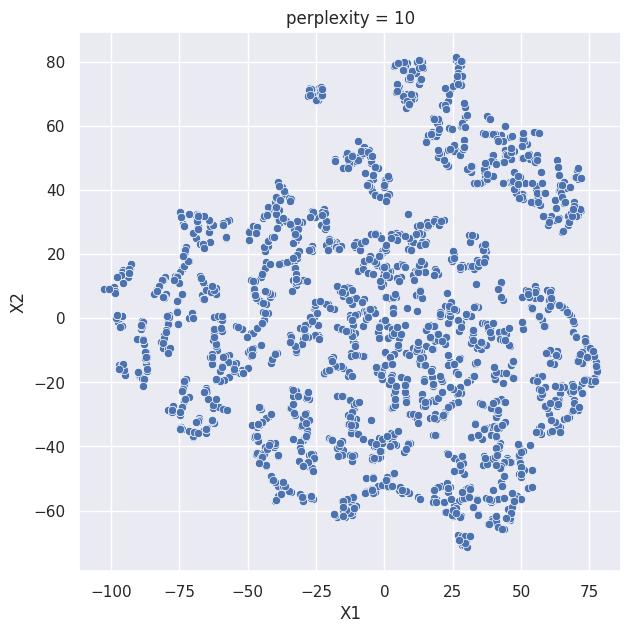

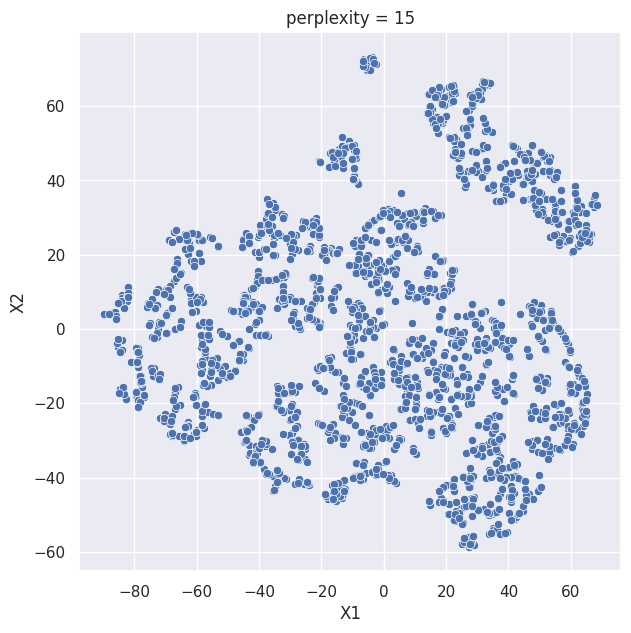

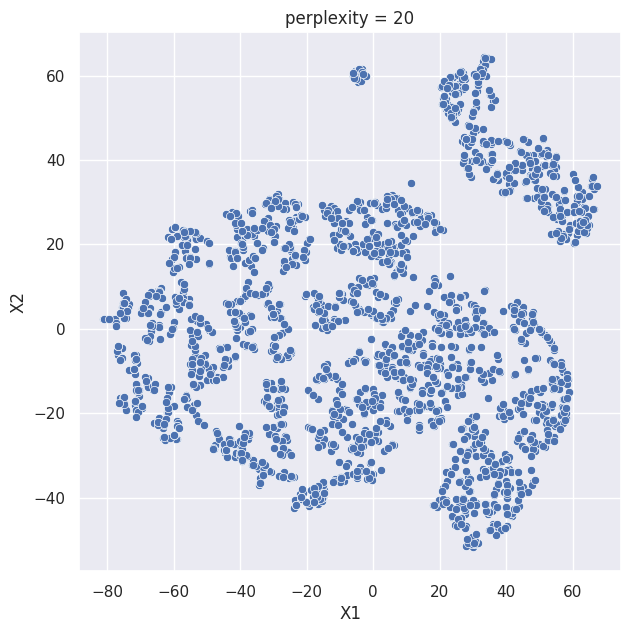

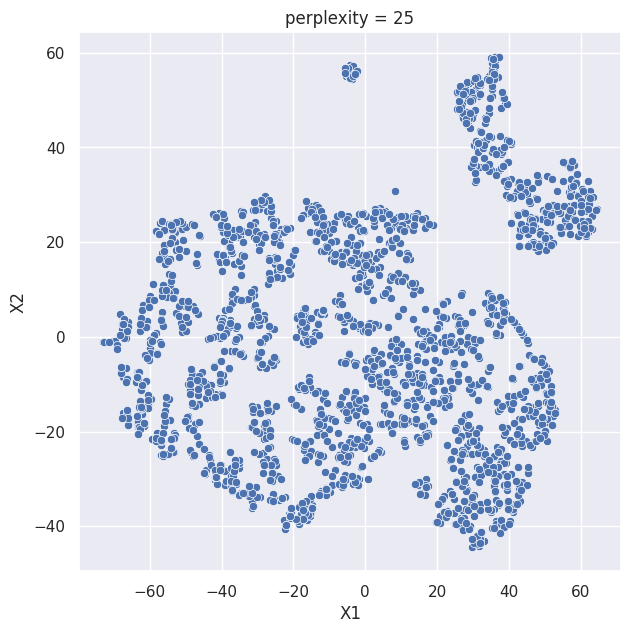

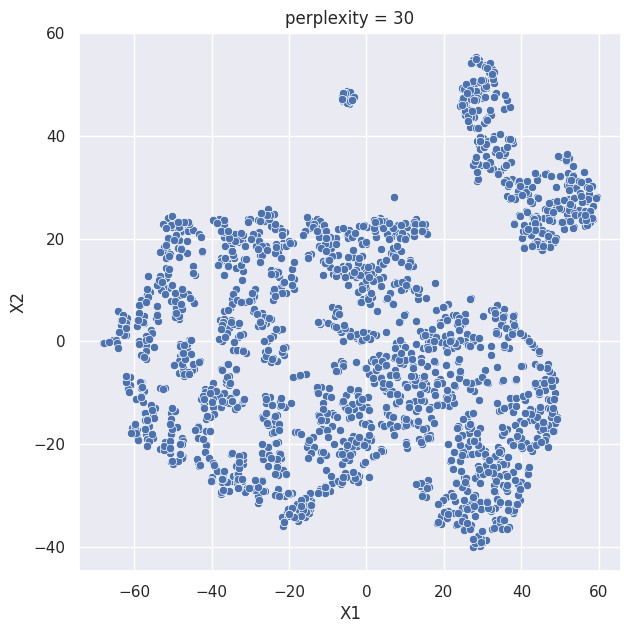

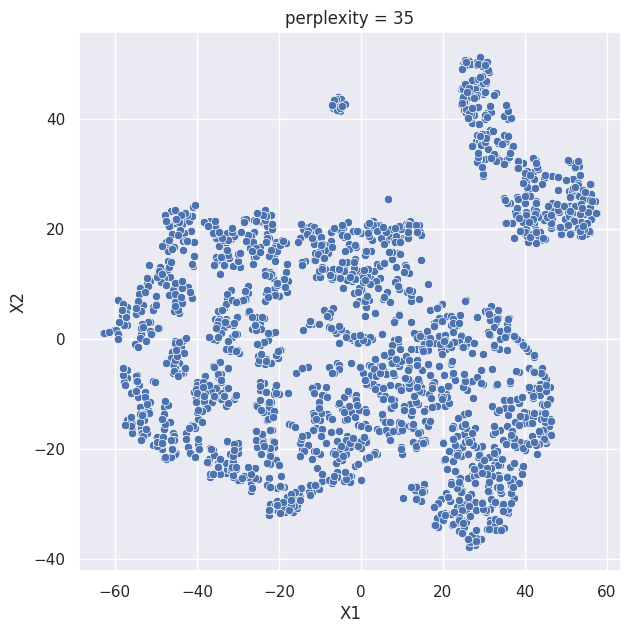

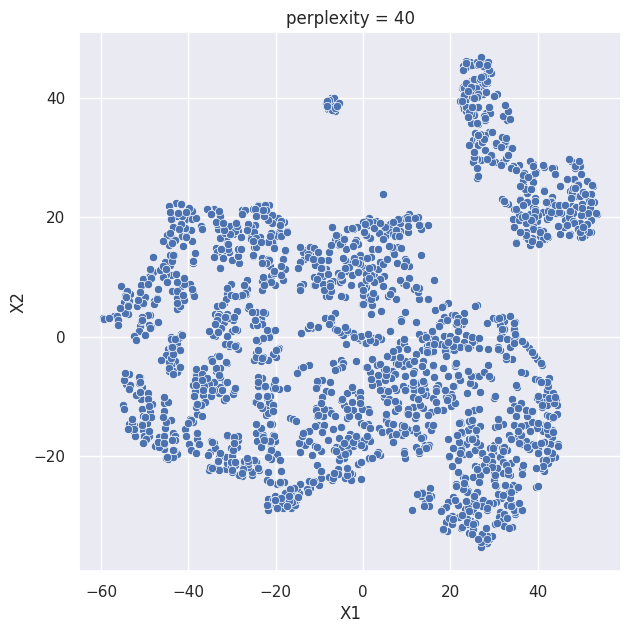

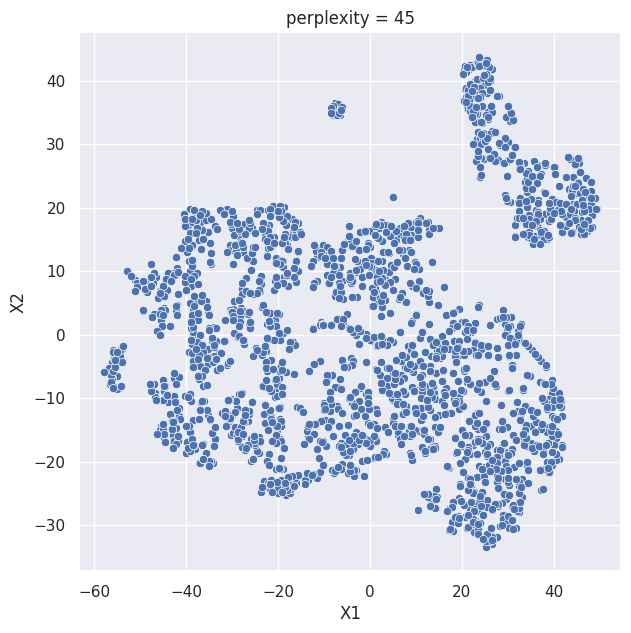

In [ ]:
for i in range(10, 50, 5):
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)

    df_clean_tsne = tsne.fit_transform(df_clean_scaled)

    df_clean_tsne = pd.DataFrame(df_clean_tsne)

    df_clean_tsne.columns = ['X1', 'X2']

    plt.figure(figsize = (7,7))

    sns.scatterplot(x = 'X1', y = 'X2', data = df_clean_tsne)

    plt.title("perplexity = {}".format(i))

**Observations:**

- Perplexity values like 35 and 40 can capture the underlying patterns in the data better than other values. The cluster grouping is defined and tighter.
- This shows that perplexity plays an important role in t-SNE implementation.
- Let's visualize again with **perplexity equal to 35 as 3 clear groups are distant from each other, i.e., well separated.**

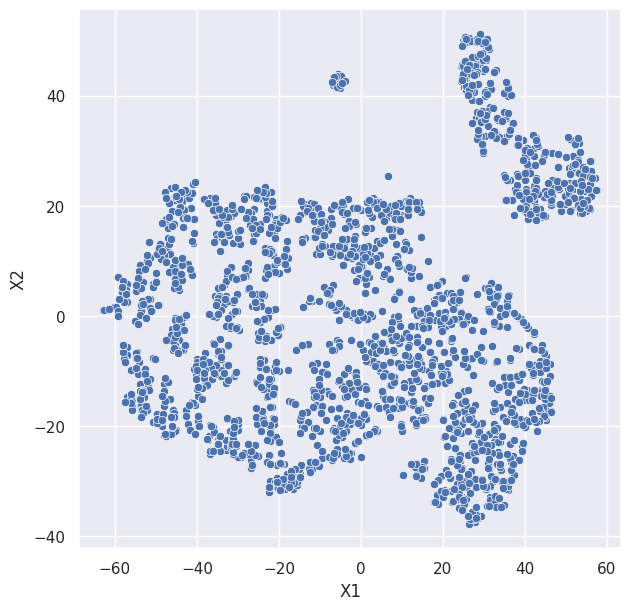

In [ ]:
# Fitting t-SNE with number of components equal to 2
tsne = TSNE(n_components = 2, random_state = 1, perplexity = 35)

df_clean_tsne = tsne.fit_transform(df_clean_scaled)

# Converting the embeddings to a dataframe
df_clean_tsne = pd.DataFrame(df_clean_tsne, columns = ["X1", "X2"])

# Scatter plot for two components
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'X1', y = 'X2', data = df_clean_tsne)

plt.show()

**Observation and Insights:**

- We can clearly see **3 groups in the data**.
- Let's **label these 3 groups** using the values of the X1 and X2 axes.

In [ ]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x['X1']

    second_component = x['X2']

    if (first_component < 0) and (second_component > 40):
        return 'group_1'

    elif (first_component > 20) and (second_component > 10):
        return 'group_2'

    else:
        return 'group_3'

In [ ]:
df_clean_tsne['groups'] = df_clean_tsne.apply(grouping, axis = 1)

<Axes: xlabel='X1', ylabel='X2'>

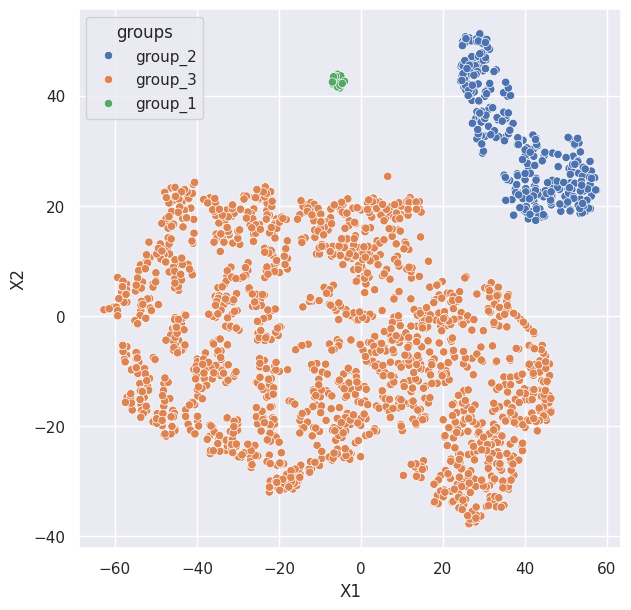

In [ ]:
# Scatter plot for two components with hue
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'X1', y = 'X2', data = df_clean_tsne, hue = 'groups')

**Visualize the clusters w.r.t different variables using scatter plot and box plot**

In [ ]:
all_col = df_clean_scaled.columns.tolist()

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(8, 3, i + 1)

    sns.boxplot(y=df_clean_scaled[variable], x=df_clean_tsne['groups'])

    plt.tight_layout()

    plt.title(variable)

plt.show()

### **Applying PCA**

**Think about it:**
- Should we apply clustering algorithms on the current data or should we apply PCA on the data before applying clustering algorithms? How would this help?



- **PCA can help to mitigate the effects of collinearity by identifying the most important variables or features that explain the maximum variance in the data. The principal components generated by PCA are uncorrelated with each other, which can reduce the redundancy in the data and can make the clustering more robust.**

In [ ]:
# Defining the number of principal components to generate, essentially the same number of columns
n = df_clean_scaled.shape[1]

# Finding principal components for the data
pca1 = PCA(n_components = n, random_state = 1)
df_clean_pca = pd.DataFrame(pca1.fit_transform(df_clean_scaled))

# The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_

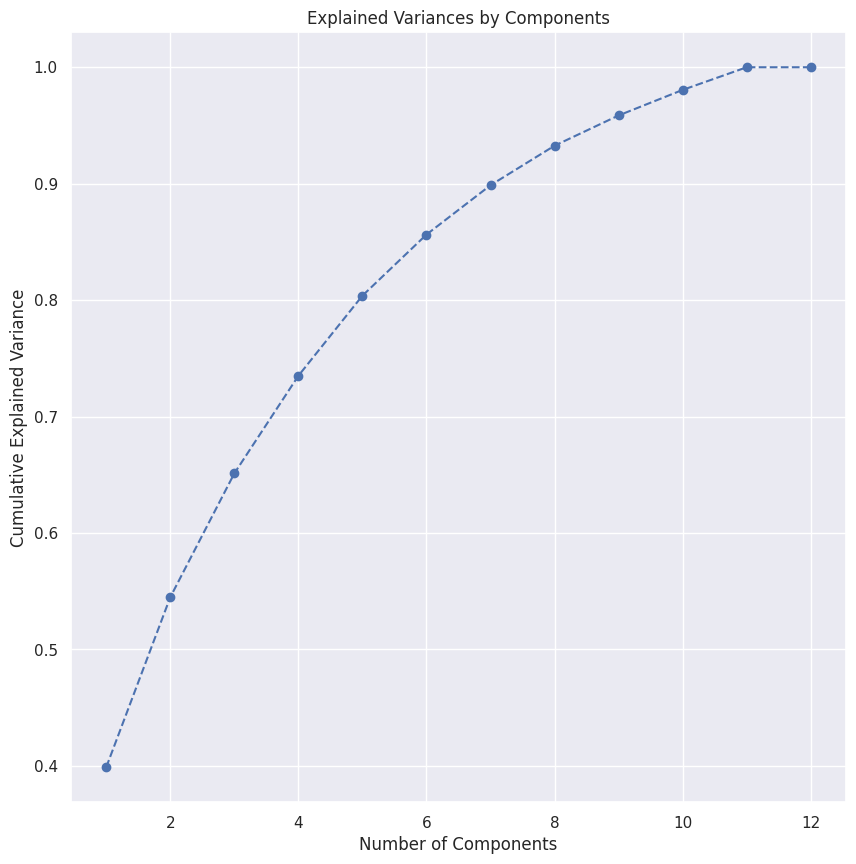

In [ ]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 13), pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [ ]:
pca1.explained_variance_ratio_


array([3.98869465e-01, 1.45989800e-01, 1.06360423e-01, 8.38206125e-02,
       6.87939455e-02, 5.24785285e-02, 4.23788371e-02, 3.39437931e-02,
       2.59779912e-02, 2.19353675e-02, 1.94485762e-02, 2.65939098e-06])

In [ ]:
# Find the least number of components that can explain more than 85% variance
sum = 0

for ix, i in enumerate(exp_var1):

    sum = sum + i

    if(sum>0.85):
        print("Number of PCs that explain at least 85% variance: ", ix + 1)
        break

Number of PCs that explain at least 85% variance:  6


#### **Interpret the coefficients of the first three principal components from the below DataFrame**

In [ ]:
# Making a new dataframe with first 6 principal components as columns and original features as indices
cols = ['PC1', 'PC2', 'PC3','PC4','PC5','PC6']

pc1 = pd.DataFrame(np.round(pca1.components_.T[:, 0:6], 2), index = df_clean_scaled.columns, columns = cols)
pc1

PC1   PC2   PC3   PC4   PC5   PC6
NumDealsPurchases   -0.03  0.56 -0.25 -0.07  0.32  0.51
NumWebPurchases      0.28  0.33 -0.21 -0.04  0.26 -0.08
NumCatalogPurchases  0.39 -0.08 -0.04  0.04 -0.11  0.22
NumStorePurchases    0.35  0.03 -0.34  0.02  0.02  0.01
NumWebVisitsMonth   -0.25  0.51  0.14 -0.05  0.08 -0.30
Complain            -0.02  0.03  0.01  0.98  0.20 -0.01
Response             0.15  0.17  0.67  0.01 -0.06  0.53
YearsLoyal           0.07  0.50  0.07  0.14 -0.73 -0.22
SpendEssentials      0.37 -0.16 -0.03  0.06 -0.27  0.23
SpendLuxuries        0.43  0.09 -0.01 -0.03  0.08 -0.24
TotalAcceptedOffers  0.24 -0.02  0.55 -0.07  0.38 -0.31
SpendPerPurchase     0.43  0.08 -0.01 -0.02  0.07 -0.23

**Observations**



1.   PC1 - The higher spenders seems to prefer store and catalog purchasing.
2.   PC2 - The most loyal customers seem to correlate strongly with online visits and deals purchased.
3.   PC3 - This seems to represent those who are more likely to accept offers, the data doesn't strongly reveal their buying preference but Catalog purchases seem to be their preferred method.
4.   PC4 - Those who complained - no strong correlation to any features.
5.   PC5 - Newer customers have seem to be more likely to accept offers and buy deals.
6.   PC6 - A group that seem to buy deals through the catalog.

#### **Visualize the data in 2 dimensions using the first two principal components**



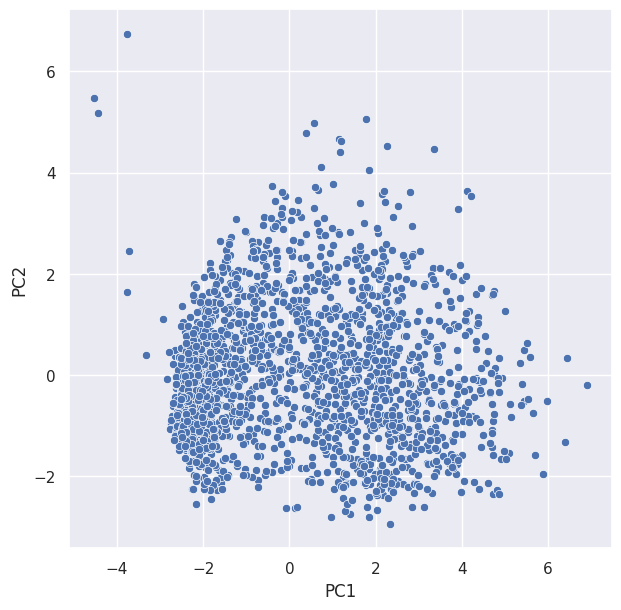

In [ ]:
plt.figure(figsize = (7,7))

sns.scatterplot(x = df_clean_pca[0], y = df_clean_pca[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Observation and Insights:**

PCA does not seem to be offering much insight in a 2D representation.

## **K-Means**

**Think About It:**

- How do we determine the optimal K value from the elbow curve?
- Which metric can be used to determine the final K value?

Let us now fit the K-means algorithm on our pca components and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the Sum of Squared Error (SSE) for each K
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and plot the elbow curve

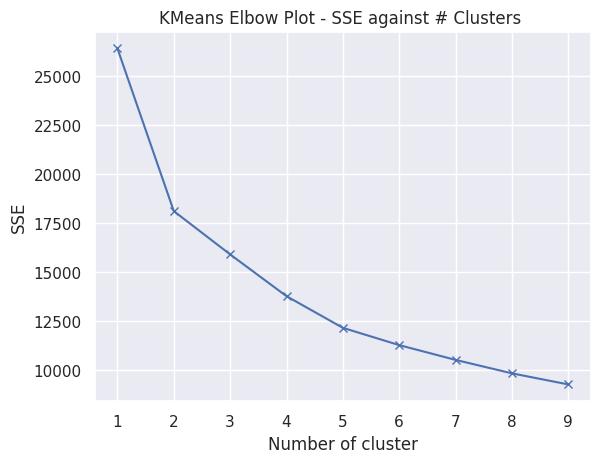

In [ ]:
# Empty dictionary to store the SSE for each value of K
sse = {}

# Iterate for a range of Ks and fit the scaled data to the algorithm.
# Use inertia attribute from the clustering object and store the inertia value for that K
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(df_clean_pca)

    sse[k] = kmeans.inertia_

# Elbow plot
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.title("KMeans Elbow Plot - SSE against # Clusters ")

plt.show()

It seems as though our SSE or distortion value is hitting plateau around 5 clusters. There is a distinct 'elbow' at 2 clusters and 5 clusters but 5 should be btter for our analysis as it may capture more patterns in the data.

In [ ]:
#Lets reset the index of df_clean_pca

df_clean_pca.reset_index(drop = True, inplace = True)

df_clean_pca_copy = df_clean_pca.copy(deep = True)

### **Applying KMeans on the PCA data and visualize the clusters**

In [ ]:
kmeans = KMeans(n_clusters = 5, random_state = 1)

kmeans.fit(df_clean_pca)

KMeans(n_clusters=5, random_state=1)

We can visualise this by plotting the clusters below.

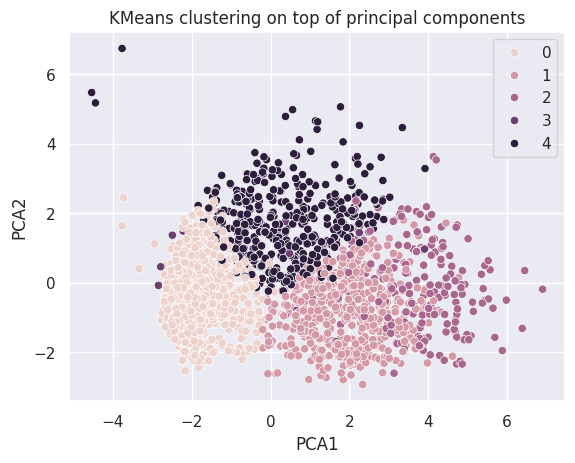

In [ ]:
#Visualising KMeans clustering on top of first two principal components using seaborn scatterplot.

sns.scatterplot(x = df_clean_pca.iloc[:,0], y = df_clean_pca.iloc[:,1], hue = kmeans.predict(df_clean_pca))

plt.xlabel("PCA1")

plt.ylabel("PCA2")

plt.title("KMeans clustering on top of principal components")

plt.show()

### **Cluster Profiling**

In [ ]:
# Creating a copy of the original data
df_clean1 = df_clean.copy()

# Adding predicted labels to the original data and the scaled pca data
df_clean_pca_copy['KMeans_Labels'] = kmeans.predict(df_clean_pca)

df_clean1['KMeans_Labels'] = kmeans.predict(df_clean_pca)

Here we are adding the Kmeans prediction and adding the column to original and PCA data, we can then see how likely each feature is to fall into the corresponding k-means cluster.

In [ ]:
df_clean1['KMeans_Labels'].value_counts()

KMeans_Labels
0    1016
1     525
4     440
2     200
3      21
Name: count, dtype: int64

**Observation:**

- This looks like a skewed clustering, with only 21 observations in one cluster and over 1000 in another.

In [ ]:
kmeans_cluster_profile = df_clean1.groupby('KMeans_Labels').mean(numeric_only = True)

In [ ]:
kmeans_cluster_profile["count_in_cluster"] = (
    df_clean1.groupby('KMeans_Labels')["SpendPerPurchase"].count().values
)


In [ ]:
kmeans_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

**Profiling Boxplots**

In [ ]:
num_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain', 'Response', 'YearsLoyal', 'SpendEssentials', 'SpendLuxuries', 'TotalAcceptedOffers', 'SpendPerPurchase']

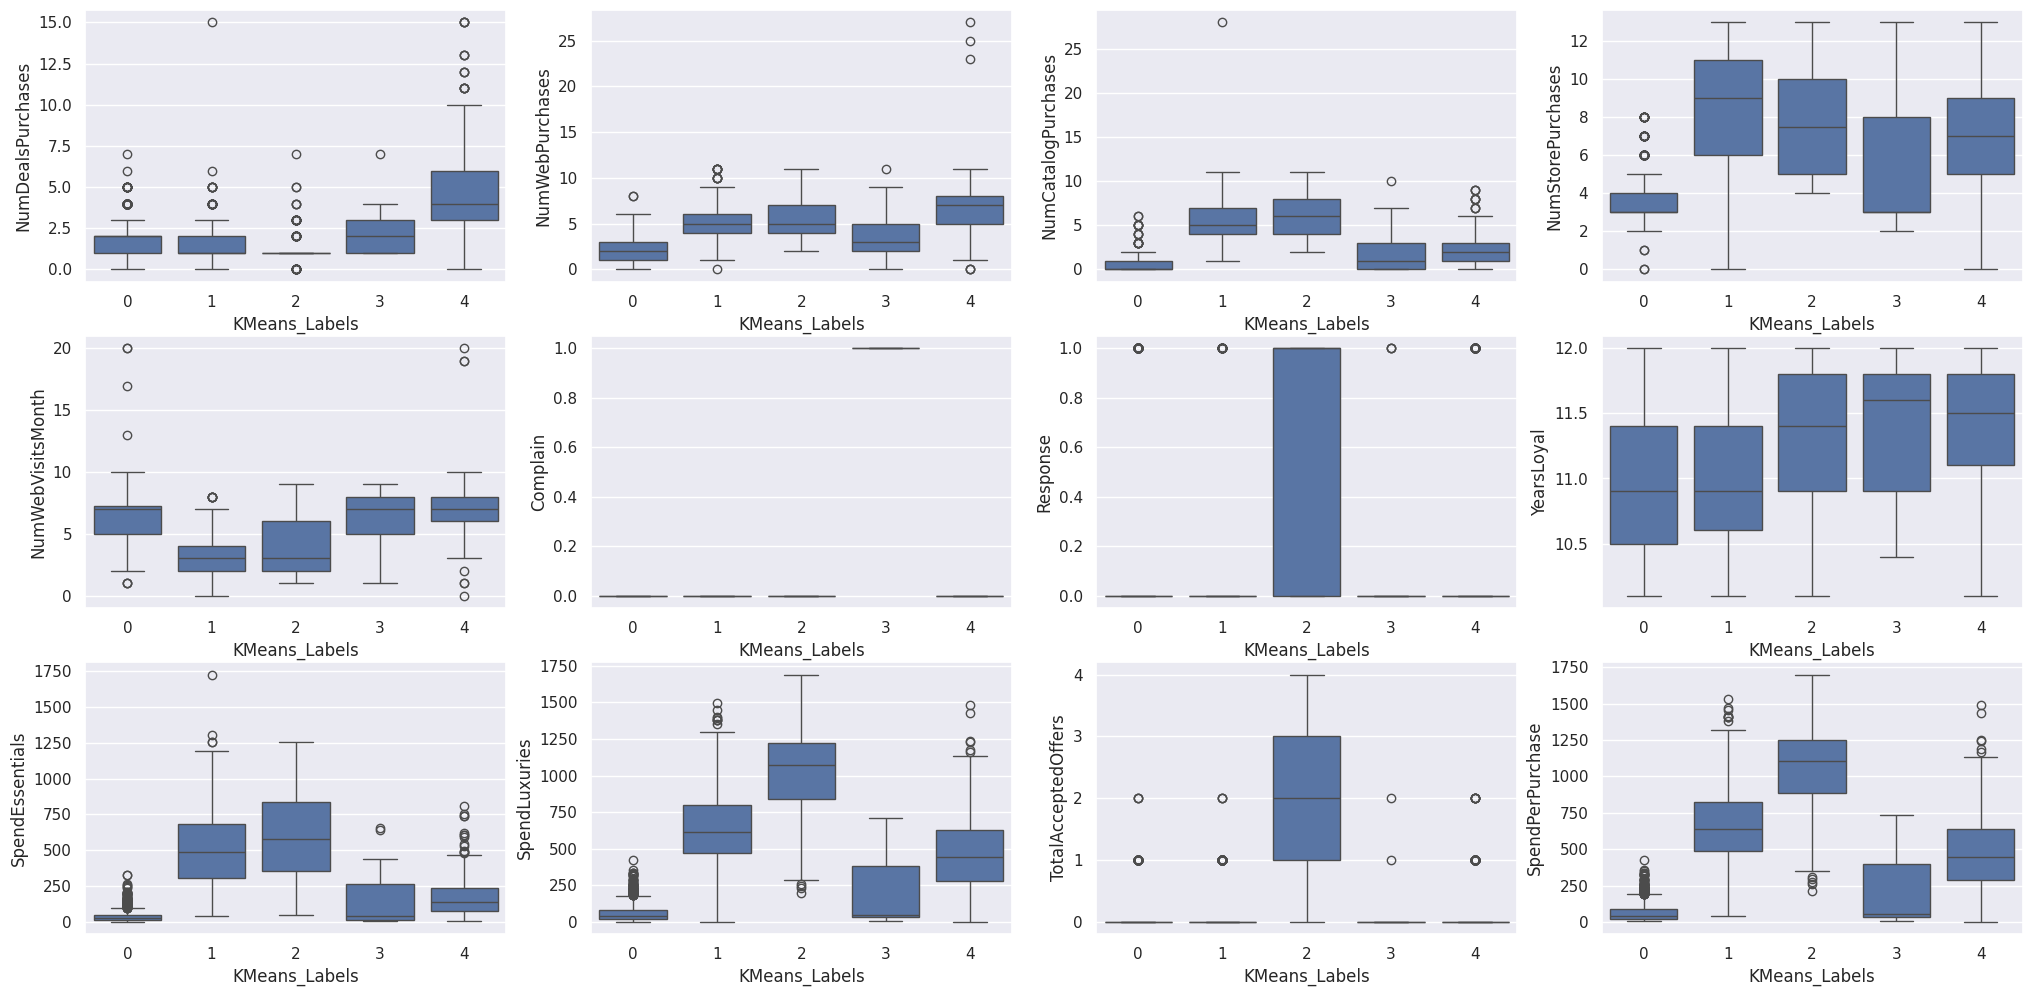

In [ ]:
#Plotting the cluster profiles so we can visualise their distribution.

fig, ax = plt.subplots (3,4, figsize = (25,12))

for i in range(3):
    for j in range(4):
        sns.boxplot (data = df_clean1, x = 'KMeans_Labels', y = num_cols[4*i+j], ax = ax[i][j])

**Observations and Insights:**

### **Describe the characteristics of each cluster**

**Think About It:**
- Are the K-Means profiles providing any deep insights into customer purchasing behavior or which channels they are using?
- What is the next step to get more meaningful insights?

# **Summary of K-Means clusters:**

*   Cluster 0 - The largest of the clusters - This seems to be the frugal spenders. They visit the web store as frequently as top spenders but their average spend per purchase is the lowest. They prefer store and web purchasing and spend more on luxuries than essentials. They aren't prone to accepting offers but do seek deals occasionally.

*   Cluster 1 - This group seems to be the second most affluent group with the second highest spend per purchase, they seek deals occasionally, spend roughly equal on luxuries and essentials and are the most frequent in store buyers.

*   Cluster 2 - This is the group with the highest spend, likely the high income group. They accept offer frequently and spend twice as much on luxuries. They prefer store shopping but are also the most frequent catalog purchasers.

*   Cluster 3 - A low spending group who have been known to complain. Although they have fairly frequent average web visits, they don't always follow through online and they prefer in store shopping.

*   Cluster 4 - This group are the most frequent web visitors and have a high follow through online, almost every visit is a sale. They also favour store visits and spend far more on luxuries than essentials.

**Lets try K-Medoids next** - K-Medoids clustering is a robust algorithm that can handle non-linear clusters and is less sensitive to outliers compared to K-Means clustering. However, it can be computationally expensive for large datasets, as it requires computing the pairwise dissimilarities between all the data points.

## **K-Medoids**

In [ ]:
kmedo = KMedoids(n_clusters = 5, random_state = 1)

kmedo.fit(df_clean_pca)

KMedoids(n_clusters=5, random_state=1)

In [ ]:
df_clean_pca

0         1         2         3         4         5         6   \
0     3.142908  1.797484  1.173219  0.195360 -1.533280  1.455357  0.972760   
1    -2.277157 -1.253745  0.110834 -0.220964  0.504284  0.362424 -0.247397   
2     1.057321 -0.283414 -1.184921 -0.066835  0.119628 -0.482168  1.297152   
3    -2.152299 -0.798124 -0.095786 -0.229078  0.535004  0.111961  0.065475   
4    -0.468059  0.249459 -1.045972 -0.287351  0.970948  1.067638 -0.233424   
...        ...       ...       ...       ...       ...       ...       ...   
2197  1.840648  0.710710 -0.708112 -0.195963  0.325896 -1.107106  0.982164   
2198 -0.139700  1.451634 -0.531541 -0.744056  3.041769  0.508864 -0.329148   
2199  2.025928 -0.773496 -0.187195 -0.240921  0.862056 -1.323491 -0.851739   
2200  1.422665 -0.893248 -1.315013 -0.109479  0.446172  0.361167  0.429083   
2201 -1.207201  1.460689  1.766245  0.057235 -1.088282  1.204941  0.563579   

            7         8         9         10        11  
0     2.044776 -0.517418  0.137537  0.561337  0.010696  
1     0.330446 -0.191243 -0.239718 -0.030054  0.004990  
2    -0.739393  0.267575  0.073113 -0.083871 -0.000087  
3    -0.125661 -0.160975  0.229786 -0.021208  0.000180  
4     0.265122  0.261708  0.055486  0.004818 -0.002835  
...        ...       ...       ...       ...       ...  
2197  1.069211 -0.841976 -1.070883 -0.944866  0.004820  
2198  0.558048  0.523734 -0.000189 -0.247084 -0.002926  
2199 -1.295008 -1.300520  0.948448  0.545126 -0.005017  
2200 -0.308673 -0.006855 -0.065641  0.479563 -0.000941  
2201 -0.674752 -0.264735 -0.248077  0.068002 -0.000791  

[2202 rows x 12 columns]

### **Visualize the clusters using PCA**

We can visualise this by plotting the clusters below.

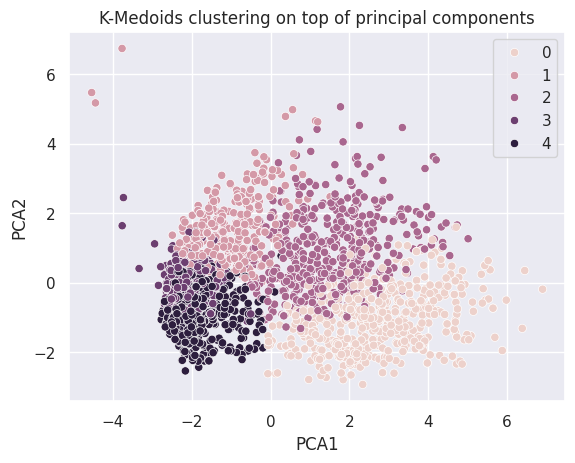

In [ ]:
#Visualising KMedoids clustering on top of first two principal components using seaborn scatterplot.

sns.scatterplot(x = df_clean_pca.iloc[:,0], y = df_clean_pca.iloc[:,1], hue = kmedo.predict(df_clean_pca))

plt.xlabel("PCA1")

plt.ylabel("PCA2")

plt.title("K-Medoids clustering on top of principal components")

plt.show()

### **Cluster Profiling**

In [ ]:
# Adding predicted labels to the original data and the scaled pca data

# Creating a copy of the original data
df_clean2 = df_clean.copy()

df_clean_pca_copy['kmedoLabels'] = kmedo.predict(df_clean_pca)

df_clean2['kmedoLabels'] = kmedo.predict(df_clean_pca)

In [ ]:
df_clean2.kmedoLabels.value_counts()

kmedoLabels
0    498
2    496
4    494
3    376
1    338
Name: count, dtype: int64

In [ ]:
kmedoids_cluster_profile = df_clean2.groupby('kmedoLabels').mean(numeric_only = True)

In [ ]:
kmedoids_cluster_profile["count_in_cluster"] = (
    df_clean2.groupby('kmedoLabels')["SpendPerPurchase"].count().values
)


In [ ]:
kmedoids_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

In [ ]:
kmedoids_cluster_profile.style.highlight_min(color = "yellow", axis = 0)

**Observations and Insights:**

### **Characteristics of each cluster**

**Summary for K-Medoid Clusters:**


*   Cluster 0 - This group may be the 'everyday shoppper' they have a high follow through online, love to buy deals and spend about the average overall. The spend double on luxuries versus essentials. They don't tend to shop through the catalog.

*   Cluster 1 - This group seems to be the more affluent group, higher spend per purchase, not interested in deals, prefer store visits and do frequently accept offers and engage with campaigns.

*   Cluster 2 - This group could be the 'frequent high spenders'. The aren't the highest spenders but a close second. They buy deals sometimes and take the lead on store and web purchases. They spend over twice as much on luxuries as exxentials.

*   Cluster 3 - The 'frugal shoppers', the group with lowest spend. Lowest offers accepted but do respond to deals. They visit the web store a lot but don't follow through to a sale often. The only group to complain.


*   Cluster 4 - This is the largest cluster and could also be considered frugal, with the second lowest spend per purchase. They prefer store purchasing although do have frequent web vists that arent followed through to sale. They also spend roughly double on luxuries.




**Observations and Insights:**



### **Comparison of cluster profiles from K-Means and K-Medoids**


1. There is a difference in the distribution of each cluster in both algorithms. The cluster groups in K-Medoids are more evenly distributed since it uses a median which is less likely to get affected by the external data/outliers.
2. The cluster profiles are the same for both algorithms, Cluster number is changing however the cluster profiles remain the same.

## **Hierarchical Clustering**

- Find the Cophenetic correlation for different distances with different linkage methods.
- Create the dendrograms for different linkages
- Explore different linkages with each distance metric

In [ ]:
hc_df = df_clean_pca.copy()

In [ ]:
hc_df1 = hc_df.copy()

In [ ]:
# List of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# List of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df1, metric = dm, method = lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.7315255058557166.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8125742684396069.
Cophenetic correlation for Euclidean distance and average linkage is 0.8413863339715029.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8244086029113725.
Cophenetic correlation for Chebyshev distance and single linkage is 0.6508863449028165.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.6217342258549551.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8088274639911986.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.7536856171873004.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7526073064759092.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.666237244263198.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8025634156129319.
Cophenetic cor

**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df1, metric = "euclidean", method = lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.7315255058557166.
Cophenetic correlation for complete linkage is 0.8125742684396069.
Cophenetic correlation for average linkage is 0.8413863339715029.
Cophenetic correlation for centroid linkage is 0.8285051197724081.
Cophenetic correlation for ward linkage is 0.5321259812690187.
Cophenetic correlation for weighted linkage is 0.8244086029113725.
****************************************************************************************************
Highest cophenetic correlation is 0.8413863339715029, which is obtained with average linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**


**Let's view the dendrograms for the different linkage methods.**

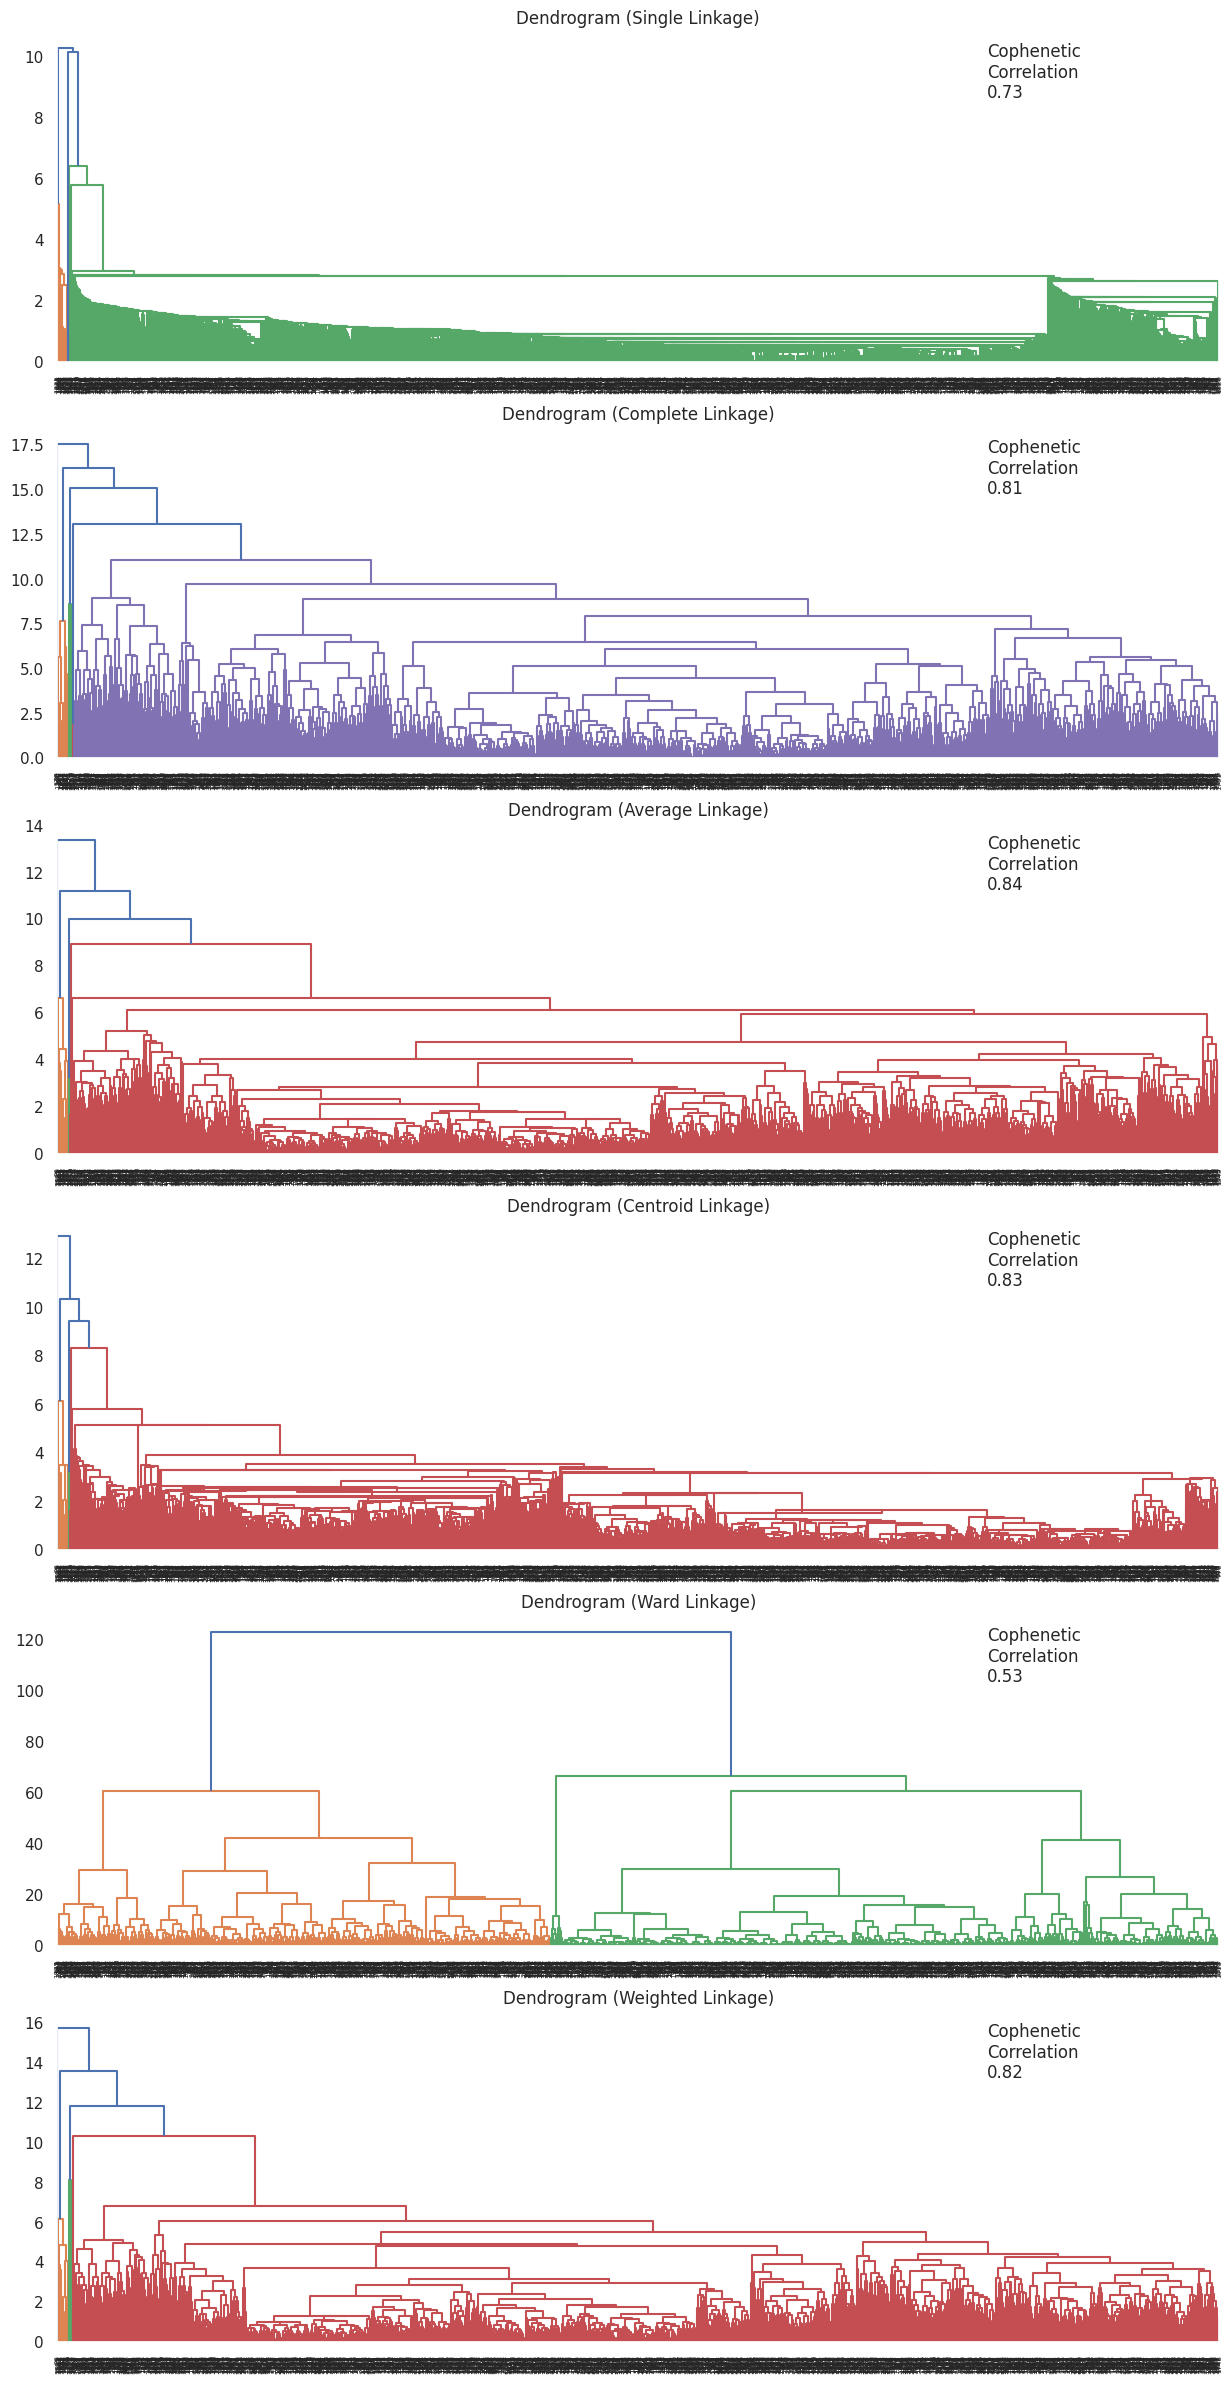

In [ ]:
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize = (15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df1, metric = "euclidean", method = method)

    dendrogram(Z, ax = axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Think about it:**

- Can we clearly decide the number of clusters based on where to cut the dendrogram horizontally?
- What is the next step in obtaining number of clusters based on the dendrogram?
- Are there any distinct clusters in any of the dendrograms?



**Only Ward Linkages gives us this clarity, we could cut at 80 for 2 distinct clusters or around 50 for 5 distinct clusters**

In [ ]:
# Create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns = compare_cols)

df_cc = df_cc.sort_values(by = "Cophenetic Coefficient")
df_cc

Linkage  Cophenetic Coefficient
4      ward                0.532126
0    single                0.731526
1  complete                0.812574
5  weighted                0.824409
3  centroid                0.828505
2   average                0.841386

**Let's move ahead with 4 clusters, Euclidean distance, and average linkage as the sklearn implementation does not support weighted linkage.**

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters = 4, metric = "euclidean", linkage = "average")
HCmodel.fit(hc_df1)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=4)

In [ ]:
# Creating a copy of the original data
df_clean3 = df_clean.copy()

# Adding hierarchical cluster labels to the PCA and original dataframes
hc_df["HC_segments_L1"] = HCmodel.labels_
df_clean3["HC_segments_L1"] = HCmodel.labels_

### **Cluster Profiling**

In [ ]:
hc_cluster_profile = df_clean3.groupby("HC_segments_L1").mean(numeric_only = True)

In [ ]:
hc_cluster_profile["count_in_cluster"] = (
    df_clean3.groupby("HC_segments_L1")["SpendPerPurchase"].count().values
)

In [ ]:
hc_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

**Observations and Insights:**

**We see that most of the customers have been grouped into one cluster, and there are two very sparse clusters. This clustering does not look good as the clusters do not have enough variability.**

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 4 appears to be a good number of clusters from the dendrogram for Ward linkage.**

In [ ]:
hc_df2 = df_clean_pca.copy()

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters = 4, metric = "euclidean", linkage = "ward")
HCmodel.fit(hc_df2)

AgglomerativeClustering(metric='euclidean', n_clusters=4)

In [ ]:
# Creating a copy of the original data
df_clean3 = df_clean.copy()

# Adding hierarchical cluster labels to the HC algorithm and original dataframes
hc_df["HC_segments_L2"] = HCmodel.labels_
df_clean3["HC_segments_L2"] = HCmodel.labels_

### **Cluster Profiling**

In [ ]:
hc_cluster_profile = df_clean3.groupby("HC_segments_L2").mean(numeric_only = True)

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df_clean3.groupby("HC_segments_L2")["SpendPerPurchase"].count().values
)

In [ ]:
hc_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

In [ ]:
hc_cluster_profile.style.highlight_min(color = "yellow", axis = 0)

**The clusters look better now. Let's check the cluster profiles.**

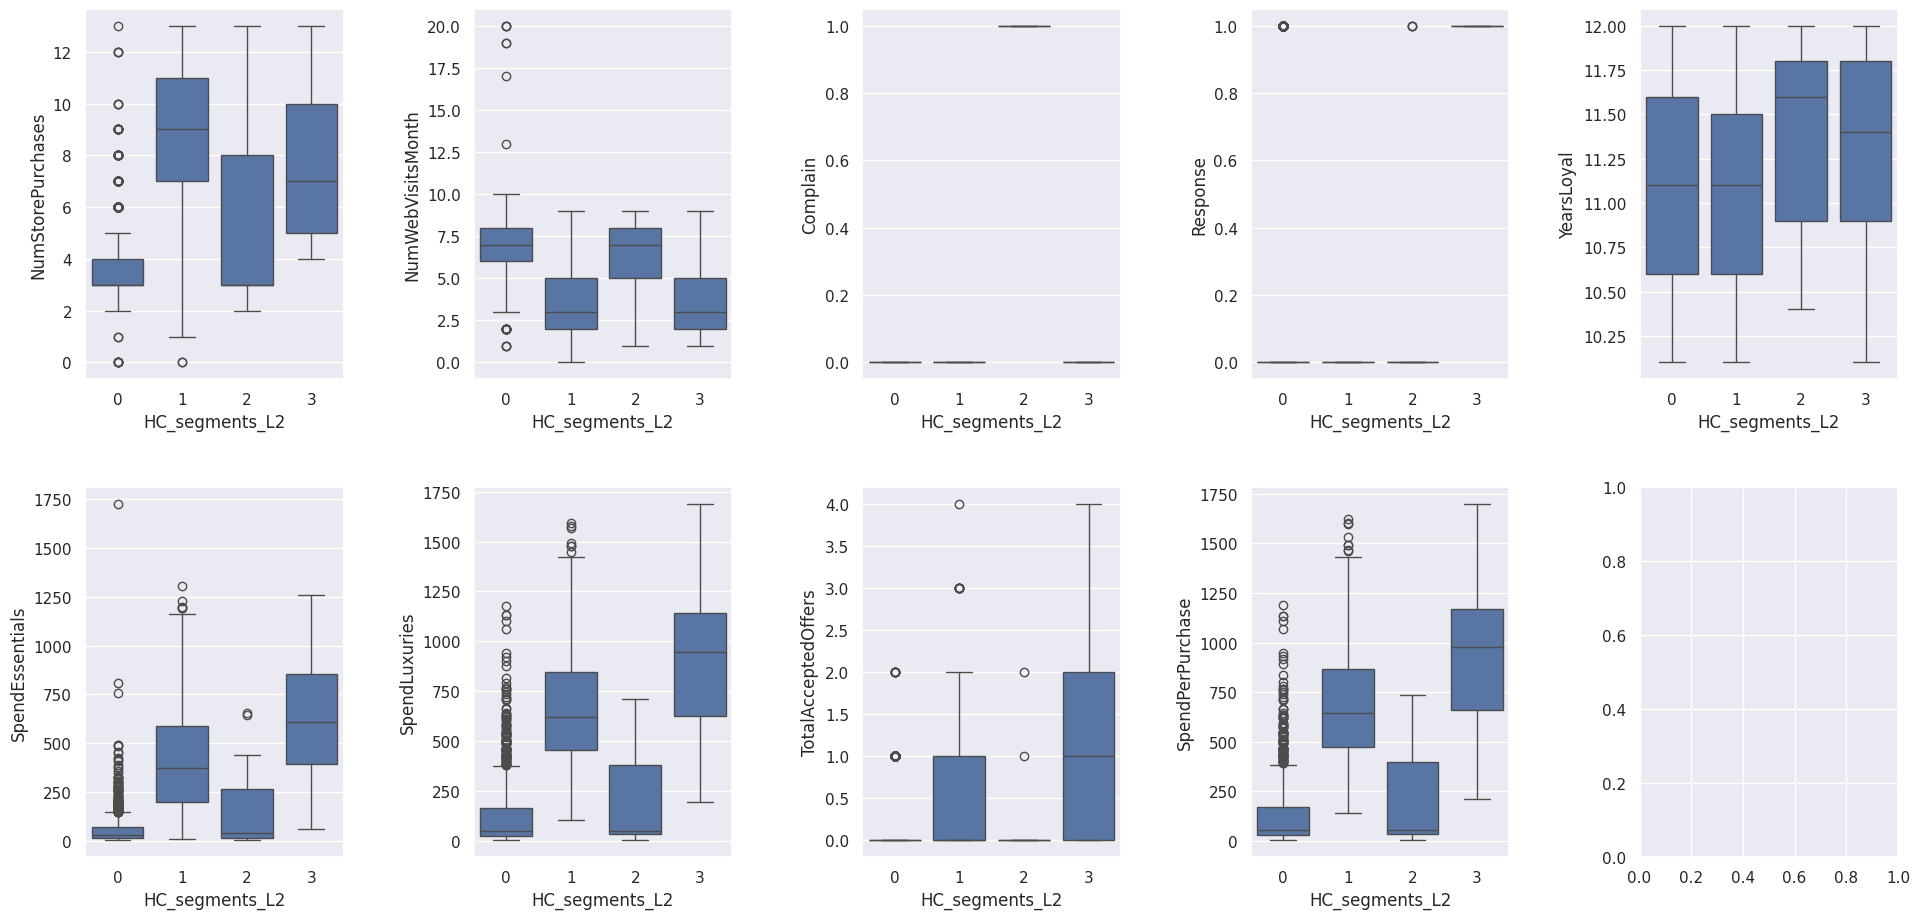

In [ ]:
fig, axes = plt.subplots(2, 5, figsize = (20, 10))
counter = 0

for ii in range(2):
    for jj in range(5):
        if counter < 9:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df_clean3,
                y = df_clean3.columns[3 + counter],
                x = "HC_segments_L2",
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

### **Characteristics of each cluster**

**Summary of each cluster:**



*   Cluster 0 - The largest segment, with 1243 customers. These are the Frugal Spenders. Lowest spend per purchase. They spend roughly 2x on luxuries, prefer web and store shopping equally but visit web a lot more frequently than others speaking to a low conversion rate online. They are the leaders in deals buying.

*   Cluster 1 - This looks like the comfortable everyday store shoppers, the second highest spend per purchase and second largest cluster after frugal spenders. They spend 57% more on luxuries than essentials. They shop across all channels but prefer in store, with the highest amount of store purchases. They sometimes buy deals and offers.

*   Cluster 2 - The group has very similar qualities to frudagal spenders, so for business recomendation, they can be theoretically grouped. They are segmented as they made complaints.

*   Cluster 3 - A small but significant cluster of customers - The Big Spenders. They have the highest spend per purchase and respond to offers much more than deals. They have a roughly even spread across store, web and catalog purchases but lead the pack in catalog purchases - pointing to an older demographic.



## **DBSCAN**

DBSCAN is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, `eps`, and `min samples`.

Since it is an unsupervised algorithm, you have no control over it, unlike a supervised learning algorithm, which allows you to test your algorithm on a validation set. The approach we can follow is basically trying out a bunch of different combinations of values and finding the silhouette score for each of them.

In [ ]:
# Convert all PCA column names to strings as required by DBSCAN
df_clean_pca.columns = df_clean_pca.columns.astype(str)

#Make copies of PCA data

dbscan_df = df_clean_pca.copy()
dbscan_df1 = dbscan_df.copy()

In [ ]:
# Initializing lists
eps_value = [2,3]           # Taking random eps value
min_sample_values = [6,20]  # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}

In [ ]:
# Finding the silhouette_score for each of the combination

high_silhouette_avg = 0                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps = i, min_samples = j).fit(dbscan_df)          # Applying DBSCAN to each of the combinations in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(dbscan_df, labels)          # Finding silhouette score
        print(
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                          # Printing the silhouette score for each of the combination
        )
        if high_silhouette_avg < silhouette_avg:                     # If the silhouette score is greater than 0 or the previous score, it will get appended to the high_silhouette_avg list with its combination of i and j
            high_i_j[0] = i
            high_i_j[1] = j

For eps value =2 For min sample =6 The average silhoutte_score is : 0.21197188210639306
For eps value =2 For min sample =20 The average silhoutte_score is : 0.11069187579062517
For eps value =3 For min sample =6 The average silhoutte_score is : 0.5724209363054126
For eps value =3 For min sample =20 The average silhoutte_score is : 0.551513433746607


In [ ]:
# Printing the highest silhouette score
print(
    "Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(
        high_silhouette_avg, high_i_j[0], high_i_j[1]
    )
)

Highest_silhoutte_avg is 0 for eps = 3 and min sample = 20


### **Apply DBSCAN for the best hyperparameter and visualize the clusters from PCA**

In [ ]:
# Applying DBSCAN with eps as 3 and min sample as 20
dbs = DBSCAN(eps = 3, min_samples = 20)

In [ ]:
dbscan_df1.head()

0         1         2         3         4         5         6  \
0  3.142908  1.797484  1.173219  0.195360 -1.533280  1.455357  0.972760   
1 -2.277157 -1.253745  0.110834 -0.220964  0.504284  0.362424 -0.247397   
2  1.057321 -0.283414 -1.184921 -0.066835  0.119628 -0.482168  1.297152   
3 -2.152299 -0.798124 -0.095786 -0.229078  0.535004  0.111961  0.065475   
4 -0.468059  0.249459 -1.045972 -0.287351  0.970948  1.067638 -0.233424   

          7         8         9        10        11  
0  2.044776 -0.517418  0.137537  0.561337  0.010696  
1  0.330446 -0.191243 -0.239718 -0.030054  0.004990  
2 -0.739393  0.267575  0.073113 -0.083871 -0.000087  
3 -0.125661 -0.160975  0.229786 -0.021208  0.000180  
4  0.265122  0.261708  0.055486  0.004818 -0.002835

In [ ]:
# Creating a copy of the original data
df5 = df_clean.copy()

# Add DBSCAN cluster labels to dbscan data
dbscan_df1["db_segments"] = dbs.fit_predict(dbscan_df1)

# Add DBSCAN cluster labels to whole data
df5["db_segments"] =  dbs.fit_predict(dbscan_df)

In [ ]:
db_cluster_profile = df5.groupby("db_segments").mean(numeric_only = True)

In [ ]:
db_cluster_profile["count_in_each_segment"] = (
    df5.groupby("db_segments")["SpendPerPurchase"].count().values
)

In [ ]:
db_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

**Observations:**

- DBSCAN was able to give only two clusters with eps = 3 and min_sample = 20 which is very skewed.  
- Changing the eps = 3 and min_sample = 6 only yielded 3 clusters and was still very skewed to one large cluster. It seems DBSCAN is not able to perform well on this dataset as these were the values wiuth highest silhouette score.


## **Gaussian Mixture Model**

In [ ]:
gmm_df = df_clean_pca.copy()

In [ ]:
# Let's apply Gaussian Mixture
gmm = GaussianMixture(n_components = 4, random_state = 1)  # Initializing the Gaussian Mixture algorithm with n_components = 4

gmm.fit(gmm_df)                                            # Fitting the algorithm on the gmm_df data

GaussianMixture(n_components=4, random_state=1)

### **Visualize the clusters using PCA**

In [ ]:
# Creating a copy of the original data
df4 = df_clean.copy()

# Adding GMM cluster labels to the original and scaled dataframes
gmm_df["GMM_segments"] = gmm.predict(gmm_df)
df4["GMM_segments"] = gmm.predict(df_clean_pca)

### **Cluster Profiling**

In [ ]:
gmm_cluster_profile = df4.groupby("GMM_segments").mean(numeric_only = True)

In [ ]:
gmm_cluster_profile["count_in_cluster"] = (
    df4.groupby("GMM_segments")["SpendPerPurchase"].count().values
)


In [ ]:
gmm_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

**Observations and Insights:**

The clusters are not very evenly distributed accross the dataset.

### **Characteristics of each cluster**



*   Cluster 0 - Lowest spenders and newest customers, these are the most regualr website visitors.
*   Cluster 1 - The highest number of deals purchased, this group spends more on luxuries despite not being the highest spenders overall. They prefer to shop in store. This is the biggest cluster.
*   Cluster 2 - The most affluent high spenders and those most likely to accept and offer.
*   Cluster 3 - Doesn't offer much insight.



## **Conclusion and Recommendations**



**Metric selected to compare the algorthims is silhouette score, lets compute and choose the best algorithm.**

In [ ]:
kmeans = KMeans(n_clusters = 6, random_state = 1, n_init = 'auto')        # Initializing K-Means with number of clusters as 6 and random_state=1

preds_km = kmeans.fit_predict((df_clean_pca))                   # Fitting and predicting K-Means on df_clean_pca

score_km = silhouette_score(df_clean_pca, preds_km)                # Calculating the silhouette score

print(score_km)

0.2610148753819184


In [ ]:
kmedoids = KMedoids(n_clusters = 6, random_state = 1)   # Initializing K-Medoids with number of clusters as 6 and random_state=1

preds_kmed = kmedoids.fit_predict((df_clean_pca))                # Fitting and predicting K-Medoids on df_clean_pca

score_kmed = silhouette_score(df_clean_pca, preds_kmed)               # Calculating the silhouette score

print(score_kmed)

0.12469453848667073


In [ ]:
# Initializing Agglomerative Clustering with distance as Euclidean, linkage as ward with clusters = 4
HCmodel = AgglomerativeClustering(n_clusters = 4, metric = "euclidean", linkage = "ward")

# Fitting on PCA data
preds_agg = HCmodel.fit_predict(df_clean_pca)

score_agg = silhouette_score(df_clean_pca, preds_agg)             # Calculating the silhouette score

print(score_agg)

0.3041639385631774


In [ ]:
# Initializing Gaussian Mixture algorithm with number of clusters as 4 and random_state = 1
gmm = GaussianMixture(n_components=4, random_state=1)

# Fitting and predicting Gaussian Mixture algorithm on data_pca
preds_gmm = gmm.fit_predict((df_clean_pca))

# Calculating the silhouette score
score_gmm = silhouette_score(df_clean_pca, preds_gmm)

# Printing the score
print(score_gmm)

0.1936317166705267


# **Proposal for the final solution design:**



Based on the silhouette score, we can see that the Agglomerative Clustering algorithm is giving the best score on the data. We would proceed with Agglomerative Clusterings as the best algorithm and 4 clusters. The clustering looks well defined and insights are eaily drawn from the clusters.

# **Recommendations for Implementation**




Based on the clustering analysis and segmentation results, the advised approach for implementing the solution is as follows:


## 1. Personalized Marketing Campaigns

**Actionables:**
*   Develop segment-specific marketing campaigns for Big Spenders, Frugal Spenders, and Comfortable Everyday Store Shoppers.

*   Tailor promotional content to match each segment’s preferences:

*   **Big Spenders** should receive luxury product promotions via catalog and
personalized email campaigns. These promotions could be sent through direct mail catalogs, their preferred channel, emphasizing exclusivity. VIP events for big spenders could also secure loyalty and drive sales in luxury products.

*   **Frugal Spenders** should be targeted with deal oriented promotions primarily through web channels. These could be discounts, bundle offers, and flash sales. Price comparison tools could also help secure sales as long as prices are lower than competitors and a loyalty points program could encourage loyalty and high overall spend.

*   **Comfortable Everyday Store Shoppers** should be targeted with in-store campaigns and multi-channel promotions, like online discounts for in-store purchases. Personalized product recommendations can also drive sales.

**Benefits:** Enhanced engagement and higher conversion rates, potentially boosting sales by 10-15%.

**Costs:** Costs for campaign development and targeted advertising estimated around $100,000.



## 2. Sales Strategies

**Actionables:**

*   Adjust sales strategies to align with each segment’s preferred channels. Improve in-store experiences for Comfortable Shoppers and optimize online convenience for Frugal Spenders.

*   Conduct training for sales staff to better serve each segment.
*   Implement a tiered loyalty program to encourage repeat purchases.

**Benefits:** Increased average spend per purchase by 5-10% and stronger customer loyalty.

**Costs:** Approx $50,000 for staff training and $75,000 for loyalty program setup.



## 3. Model Deployment

**Actionables:**

*   Integrate the clustering model into Target’s data systems to continuously analyze new customer data and maintain segmentation accuracy.
Create a feedback loop between marketing and data teams for ongoing model refinement.
*   Incorporate additional data sources, like social media interactions and email engagement, to improve predictive accuracy.

**Benefits:** Continuous insights into customer behavior and proactive strategy adjustments.

**Costs:** Initial deployment at $150,000, with $50,000 annually for maintenance.



## 4. Workshops and Training

**Actionables:**

*   Conduct workshops for marketing and sales teams to ensure they understand and apply customer segmentation insights.

**Benefits:** Improved alignment between data-driven insights and business execution.

**Costs:** Estimated $25,000 for workshops and training.



## 5. Risk Management and Challenges

**Key Risk:** Model obsolescence if customer behaviors change rapidly, resulting in ineffective campaigns and wasted budget. Mitigate with regular model reviews and updates.



## 6. Further Analysis and Data Acquisition

**Actionables:**

*   Internal data teams could continue exploring additional features that could further refine customer segmentation. Some to consider would be capturing features such as search queries, device type, social media interaction, email engagement (clicks,opens etc) and interests.
Analyze external trends affecting customer behavior to adjust strategies. Seasonality etc.

**Benefits:** More accurate segmentation and a dynamic strategy.

**Costs:** Estimated $100,000 annually for additional data analysis.



By following these recommendations, Target can capitalize on the insights gained from the clustering analysis, enhancing customer engagement, driving sales growth, and maintaining a competitive edge in the market.


# **Executive Summary**



Assumption that the store is called Target.

We have been supplied a historic data set by the team at Target and tasked with data analysis, customer segmentation and ultimately business intelligence and recommendations.

Our approach was to analyze the data, clean and prepare for clustering analysis using data science best practice and considered visualizations for best insight.

Our key findings were the emergence of 3 main customer segments from the data,  a Hierarchical clustering algorithm/approach yielded the best results, using 4 clusters and Euclidean distance and Ward linkage parameters. Two clusters were deemed suitable to be combined in post analysis, the clusters that emerged from our segmentation efforts were as follows:

*   **Big Spenders**

A small but significant cluster of customers. They have the highest spend per purchase and respond to offers much more than deals. They have a roughly even spread across store, web and catalog purchases but lead the pack in catalog purchases - pointing to an older demographic.

*   **Frugal Spenders**

The largest segment, with 1243 customers. These are the Frugal Spenders. Lowest spend per purchase. They spend roughly 2x on luxuries, prefer web and store shopping equally but visit web a lot more frequently than others speaking to a low conversion rate online. They are the leaders in deals buying.
(Analysis showed a fourth group but with similar qualities to this one, so for recommendations purposes, we consider them to fall in this cluster)

*   **Comfortable Everyday Store Shoppers**

This looks like the comfortable everyday store shoppers, the second highest spend per purchase and second largest cluster after frugal spenders. They spend 57% more on luxuries than essentials. They shop across all channels but prefer in store, with the highest amount of store purchases. They sometimes buy deals and offers.

# Key Takeaways from EDA & Data Preprocessing

The data provided was largely complete with only a small number of missing values to process. Some key takeaways were:

*   Dataset is an older demographic, with mean value for birth year 1968
*   The customers are majority well educated with only 2.5% of customers having a basic education
*   Income follows a normal distribution with the mean around $50,000. There were some extreme outliers and these were removed as they would skew our analysis
*   The mean recency was around 50 (days since the last purchase)
*   64% of customers were in a partnership (Married or Together)
*   Less than 1% of customers complained in the last year, painting to good customer satisfaction.
*   Highest mean spend was on wine, then meat, gold & fish.
*   Total spending increases with income
*   Deals purchased were highest around an income of 60K, slightly higher than mean income.

# Recommendations & Next Steps

*   **Workshops for Marketing and Sales Team**

Brief both sales and marketing teams on the clusters that we are presenting and build an understanding of the customer segments. Through a series of activities we can try to understand our customers more and therefore effectively engage with them in marketing campaigns and sales channels.

*   **Model Deployment**

To capture future customers. We believe deployment of the model would provide invaluable ongoing insight on new data and, if leverage effectively through marketing strategy, could yield significant improvements in sales conversion.

*   **Future data acquisition to include more features**

Through initial analysis and data preparation, we found that some features were redundant for the customer segmentation work and it became clear some features would aid analysis in the future. We recommend future data acquisition to capture features such as search queries, device type, social media interaction, email engagement (clicks,opens etc) and interests. Building a better understanding of the customer behavior and interaction with Target is essential and this could be improved.
